<a id='Start'></a>
# Сегментация пользователей по потреблению

## Описание проекта
Необходимо проанализировать клиентов регионального банка «Метанпром» и сегментировать пользователей по количеству потребляемых продуктов, обращая особое внимание на отток.

В нашем распоряжении датасет /datasets/bank_scrooge.csv, который содержит данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.
По итогам исследования подготовить презентацию и дашборд.

## Цель и Задачи исследования
**Цель:** Для уменьшения  оттока клиентов произвести их сегментацию. Aнализ должен показать, как клиенты пользуются услугами банка «Метанпром», а так же помочь составить портрет клиентов, которые склонны уходить из банка.

**Задача:** сегментация пользователей по потреблению. Описать сегменты клиентов и как сохранить клиентов, что сделать, чтобы оттока не было, как минимизировать отток.

Заказчик исследования – отдел маркетинга.

На основе анализа будут приняты решения о маркетинговых компаниях для сохранения клиентов.

<a id='Plan'></a>
## План исследования

### Обзор данных и изучение общей информации
1. [Общий обзор датасета (размер, содержание)](#1)
2. [Проверка  на соответствие типов данных](#2)
3. [Проверка на полноту данных (наличие/отсутствие пропусков)](#3)

### Предобработка данных
4. [Приведение к единому стилю наименований столбцов](#4)
5. [Проверка на дубликаты](#5)
6. [Анализ уникальных значений в столбцах](#6)
7. [Изменение типов данных](#7)
8. [Работа с пропусками](#8)
9. [Проверка на выбросы и аномалии](#9)

### Исследовательский анализ данных
10. [Общий портрет клиентов](#10)
11. [Признаки отточных клиентов](#11)
12. [Корреляция отточных признаков](#12)
13. [Промежуточные выводы](#13)

### Сегментация клиентов на основе того, что изучили (описание сегмента, количество клиентов, насколько отточный).

### Проверка гипотез
14. [Проверка гипотезы о различии дохода между клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним](#14)
15. [Вторая гипотеза о различии возраста между оставшимися и ушедшими клиентами](#15)

### Выводы и рекомендации

### Подготовка презентации
Презентация для менеджера, без технической информации, только основные сокращенные выводы.

**План презентации:**
1.	Цель и задачи проекта (1 слайд)
2.	Общие выводы (1 слайд)
3.	Портрет клиента (несколько слайдов с графиками и краткими выводами)
4.	Сегментация клиентов (несколько слайдов с графиками и краткими выводами)
5.	Проверка гипотез (1 слайд)
6.	Рекомендации по результатам исследования (1 слайд)


In [1]:
%autosave 120

Autosaving every 120 seconds


<a id="description"></a>
## Описание данных
Файл bank_scrooge.csv, ссылка https://code.s3.yandex.net/datasets/bank_scrooge.csv:

Столбцы:
- USERID — идентификатор пользователя
- score — баллы кредитного скоринга
<br>Скоринговый балл (кредитный рйтинг) — это оценка благонадежности и кредитоспособности заемщика на основании информации из кредитной истории. Чем выше балл, тем более благонадежным считается клиент.
- city — город
- gender — пол (м / ж)
- age — возраст
- equity — количество баллов собственности
- balance — баланс на счёте
- products — количество продуктов, которыми пользуется клиент
- credit_card — есть ли кредитная карта
<br>0 — нет карты
<br>1 — есть карта
- last_activity — активный клиент
<br>0 — не активный клиент, не было активности за последнее время
<br>1 — активный клиент
- EST_SALARY — оценочный доход клиента
- сhurn — признак оттока
<br>0 — клиент не ушёл
<br>1 — клиент ушёл

<br>[Вернуться в начало](#Start)
<br>[Вернуться к плану работы](#Plan)
<br>[Вернуться к описанию данных](#description)

## Обзор данных и изучение общей информации
<a id='1'></a>
### Общий обзор датасета

In [2]:
# импортируем необходимые библиотеки
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import rcParams
from plotly import graph_objects as go
import plotly.express as px
import seaborn as sns

from scipy import stats as st
from statistics import mode, multimode
import math as mth

# отключаем предупреждения фильтрации
import warnings
warnings.filterwarnings('ignore')

#столбцы и строки полностью, формат округлен
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

#вывод значений без сокращений
pd.set_option('display.max_colwidth', -1)

In [3]:
# Откроем датасет и сохраним его в переменную data:
try:
    data = pd.read_csv('https://disk.yandex.ru/client/disk/Яндекс%20Практикум/Final/bank_scrooge.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/bank_scrooge.csv')

# просмотр случайных строк датасета
data.sample(10)

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
2229,169121,920.00,Рыбинск,Ж,60.00,0,NaN,1,0,0,"655,602.65",0
5134,110912,948.00,Ярославль,Ж,58.00,4,"3,862,983.04",3,0,1,"165,260.44",0
5317,194802,908.00,Ярославль,М,63.00,0,NaN,1,1,1,"112,289.74",0
9133,175578,809.00,Рыбинск,Ж,57.00,4,"1,310,268.93",2,1,1,"82,905.32",0
7627,196023,752.00,Ярославль,М,63.00,2,"478,106.16",2,1,0,"90,666.33",0
4923,176640,885.00,Ростов,М,59.00,3,"1,356,200.99",2,0,0,"132,919.40",0
4314,157446,867.00,Ростов,Ж,49.00,0,"290,619.24",2,0,0,"59,005.08",0
3205,181537,920.00,Ярославль,М,39.00,0,NaN,3,0,1,"207,942.22",0
5845,139845,842.00,Ярославль,М,44.00,4,"3,379,228.05",2,0,1,"128,656.24",1
5471,121796,909.00,Ярославль,Ж,53.00,0,"885,522.31",2,0,0,"206,348.12",0


<a id='2'></a>
### Проверка  на соответствие типов данных

In [4]:
# смотрим общую информацию
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


<a id='3'></a>
### Проверка на полноту данных (наличие/отсутствие пропусков)

In [5]:
# посмотрим на процент пропущенных значений в столбцах age и balance
print(round(data.isna().sum()/len(data)*100,1))

USERID          0.00 
score           0.00 
city            0.00 
gender          0.00 
age             0.30 
equity          0.00 
balance         23.00
products        0.00 
credit_card     0.00 
last_activity   0.00 
EST_SALARY      0.00 
churn           0.00 
dtype: float64


Датасет состоит из 10000 строк и 12 столбцов. В данных присутствуют пропущенные значения в столбцах age (0,3% датасета) и balance (23%).

Большей частью информация в датасете состоит из вещественных и целых чисел. Два столбца содержат информацию строкового типа - city и gender. В целом, типы данных соотносятся с типом хранящейся информации, кроме столбцов score и age - необходимо изменить тип данных на int64, так как скорринговый балл и возраст это целые числа.

Название столбцов необходимо привести к нижнему регистру. 

In [6]:
# посмотрим описательную статистику для столбцов числового типа
data.describe()

,USERID,score,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
count,"10,000.00","10,000.00","9,974.00","10,000.00","7,705.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00"
mean,"171,814.71",848.70,42.73,2.63,"827,794.31",1.87,0.68,0.52,"147,866.89",0.18
std,"33,708.24",65.45,12.18,1.98,"1,980,614.15",0.79,0.47,0.50,"139,388.51",0.39
min,"94,561.00",642.00,18.00,0.00,0.00,0.00,0.00,0.00,"2,546.30",0.00
25%,"142,810.25",802.00,33.00,0.00,"295,554.16",1.00,0.00,0.00,"75,251.90",0.00
50%,"172,728.00",853.00,40.00,3.00,"524,272.20",2.00,1.00,1.00,"119,658.10",0.00
75%,"201,261.75",900.00,51.00,4.00,"980,705.85",2.00,1.00,1.00,"174,500.54",0.00
max,"229,145.00","1,000.00",86.00,9.00,"119,113,552.01",5.00,1.00,1.00,"1,395,064.45",1.00


На данном этапе можно отметить следующее:

- баллы кредитного скоринга имеют разброс от 642 до 1 000
- возрастная категория от 18 до 86 лет. Средний и медианный возраст клиентов имеет небольшую разницу и равен 40-42 годам
- количество баллов (объектов) собственности от 0 до 9, в среднем 3
- баланс на счёте от 0 до 119 113. При этом, средняя и медианная величины не равны, значит есть выбросы
- клиенты пользуются от 0 до 5 продуктами банка, в среднем 2
- доходы клиентов составляют от 2546 до 1 395 064 руб., в среднем - 139 388 руб.

<br>[Вернуться в начало](#Start)
<br>[Вернуться к плану работы](#Plan)
<br>[Вернуться к описанию данных](#description)

## Предобработка данных
<a id='4'></a>
### Приведение к единому стилю наименований столбцов 

In [7]:
# Приведем к snake_case наименования столбцов датасета
data.columns = data.columns.str.lower()
data.columns

Index(['userid', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'est_salary', 'churn'],
      dtype='object')

<a id='5'></a>
### Проверка на дубликаты

In [8]:
#проверим на наличие явных дубликатов
data.duplicated().sum()

0

In [9]:
# проверим на задвоенные записи в столбце userid
data['userid'].duplicated().sum()

73

In [10]:
# процент задвоенных записей в userid
print(round(data['userid'].duplicated().sum()/len(data)*100,1))

0.7


Доля задвоенных записей в столбце составляет 0,7% от всего датасета. Удалим дубликаты.

In [11]:
# удаляем дубликаты в столбце userid
data = data.drop_duplicates(subset=['userid'], keep='first')
# проверяем результат удаления дубликатов в столбце userid
data['userid'].duplicated().sum()

0

<a id='6'></a>
### Анализ уникальных значений в столбцах

In [12]:
#проверим, что уникальных городов всего 3
data['city'].unique()

array(['Рыбинск', 'Ярославль', 'Ростов'], dtype=object)

In [13]:
#смотрим уникальные значения в столбце количество объектов в собственности
data['equity'].unique()

array([1, 5, 0, 4, 3, 2, 6, 7, 8, 9], dtype=int64)

<a id='7'></a>
### Изменение типов данных

In [14]:
# Приведем данные в столбцах score и age к типу int64:
data['score'] = data['score'].astype ('int64', errors = 'ignore')
data['age'] = data['age'].astype ('int64', errors = 'ignore')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9927 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   userid         9927 non-null   int64  
 1   score          9927 non-null   int64  
 2   city           9927 non-null   object 
 3   gender         9927 non-null   object 
 4   age            9923 non-null   float64
 5   equity         9927 non-null   int64  
 6   balance        7667 non-null   float64
 7   products       9927 non-null   int64  
 8   credit_card    9927 non-null   int64  
 9   last_activity  9927 non-null   int64  
 10  est_salary     9927 non-null   float64
 11  churn          9927 non-null   int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 1008.2+ KB


<a id='8'></a>
### Работа с пропусками

Ранее в исследовании в столбце age / возраст были обнаружены пропуски. Они составляют менее 1% данных датасета. Удалим строки с пропусками в столбце age

In [15]:
# удаляем строки с пропусками в столбце age
data = data.dropna(subset=['age'])
# проверяем результат удаления
data.info()
print()
print(round(data.isna().sum()/len(data)*100,1))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9923 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   userid         9923 non-null   int64  
 1   score          9923 non-null   int64  
 2   city           9923 non-null   object 
 3   gender         9923 non-null   object 
 4   age            9923 non-null   float64
 5   equity         9923 non-null   int64  
 6   balance        7663 non-null   float64
 7   products       9923 non-null   int64  
 8   credit_card    9923 non-null   int64  
 9   last_activity  9923 non-null   int64  
 10  est_salary     9923 non-null   float64
 11  churn          9923 non-null   int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 1007.8+ KB

userid          0.00 
score           0.00 
city            0.00 
gender          0.00 
age             0.00 
equity          0.00 
balance         22.80
products        0.00 
credit_card     0.00 
last_activity

22,8 % пропусков мы наблюдаем в столбце баланс на счете у клиентов.

**Исследуем пропуски в столбце balance.**

Для этого создадим отдельный датасет с пропущенными значениями в столбце Баланс. Попробуем найти закономерность и, по возможности, заменить пропуски логическими значениями.

In [16]:
# создадим датасет с пропущенными значениями в столбце Баланс
balance_nan = data.query('balance.isna()')
balance_nan.head()

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
2,120722,892,Рыбинск,Ж,30.00,0,NaN,1,1,1,"107,683.34",0
9,133130,906,Ярославль,Ж,67.00,0,NaN,1,0,1,"238,055.53",0
10,148929,927,Ростов,М,52.00,0,NaN,1,1,1,"196,820.07",0
11,172184,921,Ростов,М,41.00,0,NaN,1,1,1,"217,469.48",0
19,127034,922,Рыбинск,Ж,53.00,0,NaN,1,0,0,"147,094.82",0


In [17]:
# проверим, как распределены пропущенные значения в столбце баланс в датасете с пропущенными значениями в столбце Баланс
# по городам, количеству продуктов, активности клиентов и признаку оттока
for column in ['city','products','credit_card','last_activity', 'churn']:
    print(column)
    print(round(balance_nan[column].value_counts(normalize=True),2))
    print()

city
Ярославль   0.64
Рыбинск     0.25
Ростов      0.10
Name: city, dtype: float64

products
1   0.85
2   0.14
3   0.01
0   0.00
Name: products, dtype: float64

credit_card
1   0.82
0   0.18
Name: credit_card, dtype: float64

last_activity
1   0.55
0   0.45
Name: last_activity, dtype: float64

churn
0   0.99
1   0.01
Name: churn, dtype: float64



Баланс отсутствует чаще всего у клиентов из Ярославля или Рыбинска.
<br>В 85% случаев это клиенты с одним продуктом, в 82% баланс отсутствует по клиентам, имеющим кредитную карту,  при этом одинаково как у активных, так и у неактивных клиентов. И почти все клиенты с отсутствующим балансом не отточные, действующие.

Посмотрим распределение пропусков в данных о балансе клиента по возрасту, количеству объектов в собственности, доходу и рейтингу.

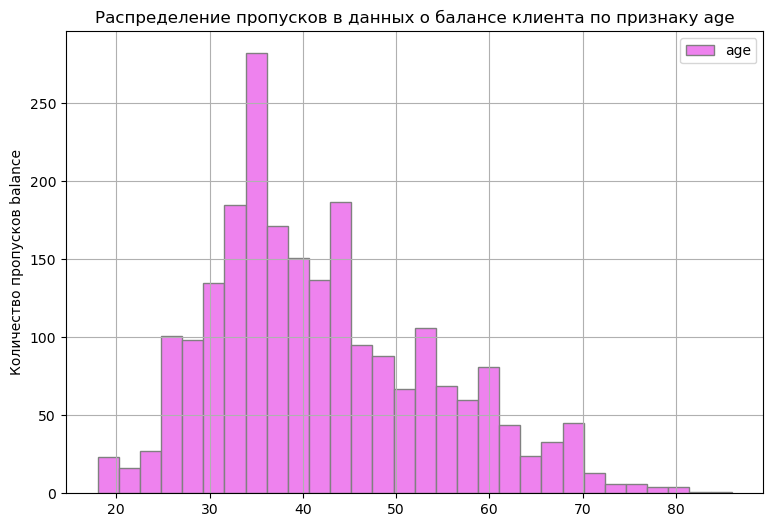

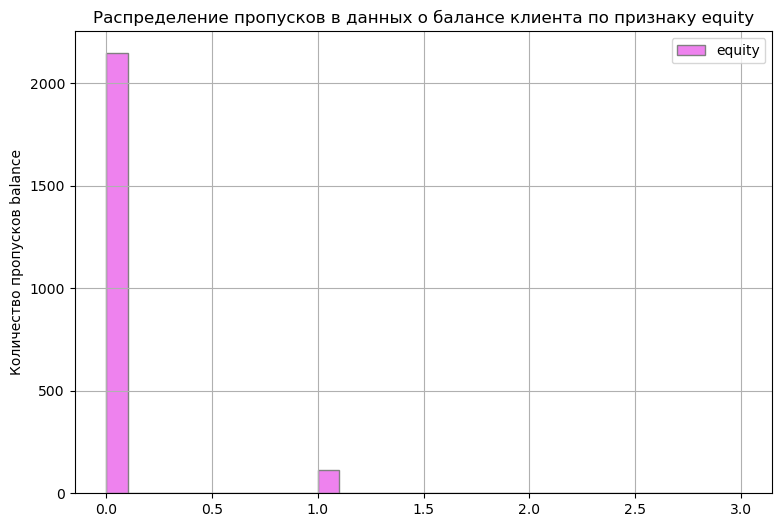

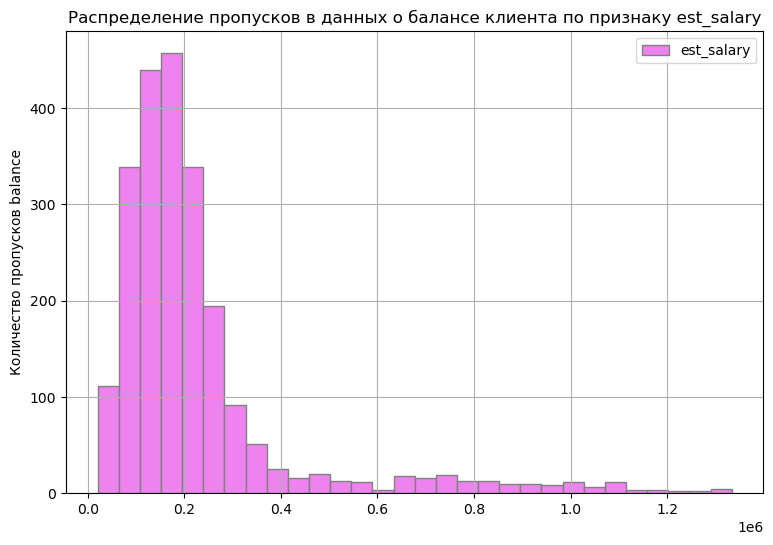

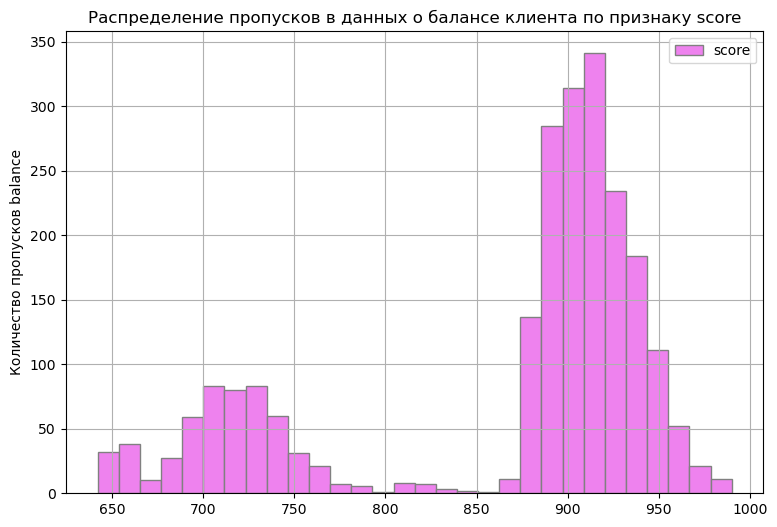

In [18]:
for column in ['age','equity', 'est_salary', 'score']:
    balance_nan.plot(y = column,
                     kind = 'hist',
                     figsize = (9,6),
                     bins = 30,
                     grid = True,
                     color='violet',
                     edgecolor='gray')
    plt.title(f'Распределение пропусков в данных о балансе клиента по признаку {column}')
    plt.ylabel('Количество пропусков balance')
    plt.show()

На диаграммах мы видим, что бОльшая часть пропусков в данных о балансе (более 90%) у клиентов, не имеющих ни одного объекта в собственности. Возможно, это клиенты, пользующиеся в "Метанпром" банковскими продуктами типа "без залога", например, потребительский кредит, счёт, дебетовая или крдитная карта, страховка и тому подобное.
<br>Более 250 пропусков данных о балансе по клиентам в возрасте около 35 лет (порядка 12%).
<br>Значительная доля пропусков по клиентам с доходами от 150 до 250 тысяч (около 20%).
<br>Что касается признака балл кредитного скорринга, то данные о балансе в основном отсутствуют у клиентов с рейтингом 700-750 и 880-930 (15%).

Посмотрим коррелируются ли значения в столбце "баланс на счёте" с другими признаками.

In [19]:
data.corr()

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
userid,1.00,0.01,0.02,0.00,0.01,-0.00,0.00,-0.03,-0.00,-0.01
score,0.01,1.00,-0.01,0.07,0.24,-0.00,-0.10,-0.03,0.16,0.11
age,0.02,-0.01,1.00,0.02,0.07,0.02,-0.12,-0.01,-0.04,-0.05
equity,0.00,0.07,0.02,1.00,0.16,0.43,-0.17,-0.00,-0.17,0.27
balance,0.01,0.24,0.07,0.16,1.00,0.08,-0.06,0.02,0.34,0.09
products,-0.00,-0.00,0.02,0.43,0.08,1.00,-0.25,0.04,-0.12,0.30
credit_card,0.00,-0.10,-0.12,-0.17,-0.06,-0.25,1.00,-0.03,0.04,-0.13
last_activity,-0.03,-0.03,-0.01,-0.00,0.02,0.04,-0.03,1.00,0.00,0.17
est_salary,-0.00,0.16,-0.04,-0.17,0.34,-0.12,0.04,0.00,1.00,0.00
churn,-0.01,0.11,-0.05,0.27,0.09,0.30,-0.13,0.17,0.00,1.00


По итогу можно дать оценку корреляции значений столбца "баланс на счёте" с другими признаками как **слабая** корреляция.

Создадим новый столбец **type_balance**, в котором отметим 1 - строки с заполненным балансом, 0 - с балансом NaN. И сравним распределение признаков в обех частях: с пропусками и без пропусков:

In [20]:
# Создадим в датасете data столбец type_balance с категориями 1 и 0,
# где  1 - строки без пропусков в балансе, 0 - строки с NaN в балансе       
        
def type_balance(row):       
    if row['balance'] >= 0:
        return '1'
    else:
        return '0'

In [21]:
# применим функцию к столбцу balance    
data['type_balance'] = data[['balance']].apply(type_balance, axis=1)
# axis=1 в этой записи говорит о том, что функцию будем применять построчно

# Поверим работу функции
print(data['type_balance'].unique()) 
data.head(10)

['1' '0']


,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,type_balance
0,183012,850,Рыбинск,Ж,25.00,1,"59,214.82",2,0,1,"75,719.14",1,1
1,146556,861,Рыбинск,Ж,37.00,5,"850,594.33",3,1,0,"86,621.77",0,1
2,120722,892,Рыбинск,Ж,30.00,0,NaN,1,1,1,"107,683.34",0,0
3,225363,866,Ярославль,Ж,51.00,5,"1,524,746.26",2,0,1,"174,423.53",1,1
4,157978,730,Ярославль,М,34.00,5,174.00,1,1,0,"67,353.16",1,1
5,202305,856,Рыбинск,М,56.00,4,"863,687.24",3,1,0,"156,619.80",0,1
6,177259,807,Ярославль,Ж,39.00,3,"405,042.44",3,0,1,"103,838.32",0,1
7,218868,825,Ярославль,Ж,38.00,4,"458,145.40",2,1,1,"68,085.48",0,1
8,211686,923,Ярославль,М,54.00,5,"1,206,337.87",2,1,0,"155,371.79",0,1
9,133130,906,Ярославль,Ж,67.00,0,NaN,1,0,1,"238,055.53",0,0


Посмотрим агрегированные значения признаков параметров в зависимости от наличия/отсутствия пропуска в балансе:

In [22]:
# Средние по: скорринговый балл, возраст, доходы, наличие кредитки, активность

data.groupby('type_balance').agg({ 'score' : 'mean',
      'age' : 'mean',
      'est_salary' : 'mean',
      'credit_card': 'mean',
      'last_activity': 'mean',
      'churn': 'mean'})

,score,age,est_salary,credit_card,last_activity,churn
type_balance,,,,,,
0,865.33,42.13,"226,700.56",0.82,0.55,0.01
1,843.84,42.91,"124,642.36",0.64,0.52,0.24


In [23]:
# Медиана по: количество продуктов, объектов в собственности

data.groupby('type_balance').agg({ 'products' : 'median', 'equity' : 'median'})

,products,equity
type_balance,,
0,1.00,0.00
1,2.00,4.00


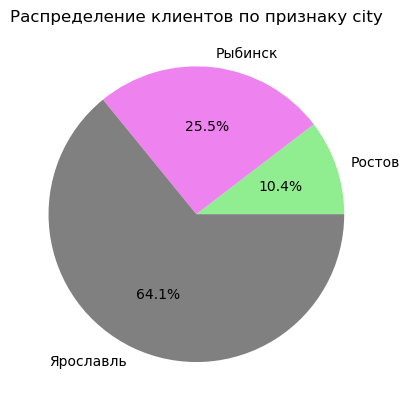

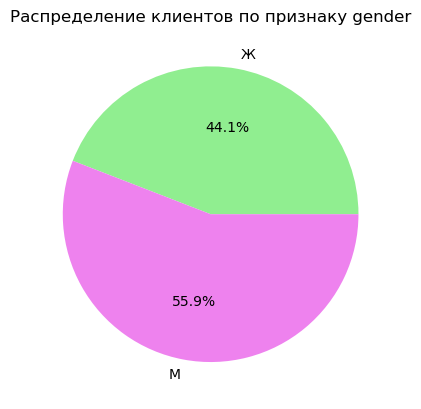

In [24]:
# Смотрим доли по городу и гендеру в датасете с пропусками в балансе
for column in ['city','gender']:
    df = balance_nan.groupby(column).agg({'userid': 'count'})
    fig1,ax1 = plt.subplots()
    ax1.pie(
        df['userid'],
        labels=df.index,
        autopct='%1.1f%%',
        colors = ['lightgreen', 'violet', 'gray', 'purple'])
    ax1.set_title(f'Распределение клиентов по признаку {column}')
    plt.show()

Доля Ярославля самая большая 64,1%, Рыбинск 25,5%, Ростов 10,4%. Мужчин больше, чем женщин (55,9% и 44,1%).

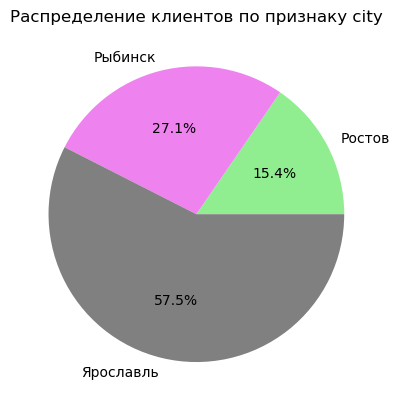

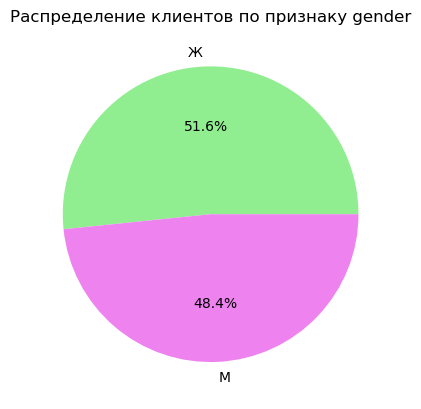

In [25]:
# Смотрим доли по городу и гендеру в датасете без пропусков в балансе
# создадим датасет без пропущенных значаний в столбце Баланс
balance_full = data.dropna(subset=['balance'])

for column in ['city','gender']:
    df = balance_full.groupby(column).agg({'userid': 'count'})
    fig1,ax1 = plt.subplots()
    ax1.pie(
        df['userid'],
        labels=df.index,
        autopct='%1.1f%%',
        colors = ['lightgreen', 'violet', 'gray', 'purple'])
    ax1.set_title(f'Распределение клиентов по признаку {column}')
    plt.show()

Доля Ярославля самая большая 57,5%, Рыбинск 27,1%, Ростов 15,4%. Женщин больше, чем мужчин (51,6% и 48,4%).

**В результате анализа датасетов с отсутствующим балансом и с полными данными по балансу сделаем выводы:**
<br>Среднее по скорринговому баллу (843-864 балла), возрасту (42-43 года), активности и самый часто встречающийся город (Ярославль) в данных - одинаковые.
<br>В данных с пропусками в балансе сосредоточены клиенты мужчины, с наиболее высокими доходами (226 тысяч против 126 тысяч в датасете с полными данными), отток у них значительно реже (доля 0,01 к 0,24 в полных данных), в среднем с двумя продуктами и 4 объектами в собственности (в полных данных в среднем чаще 0 объектов у клиента).
<br>В данных без пропусков в балансе клиенты чаще женщины, с 1 продуктом.

**Общий вывод** 

Предполагаем, что пропуски в столбце balance датасета имеют случайное происхождение и при небольшом процентном соотношении пропусков в данных мы могли бы их удалить.
<br>Заполнить все нулями было бы не совсем правильно, так как это довольно большая часть датасета и эта замена может исказить распределение известных нам данных. 
<br>Можно было бы заменить все медианами, но и это тоже не самая лучшая идея, так как нам точно не известно, чем вызваны пропуски в данных и есть ли на самом деле у всех этих клиентов деньги на счетах.
<br>**Учитывая итоги изучения взаимосвязи пропусков в данных о балансе, пропуски в этом столбце, возможно, у тех клиентов, кто пользуется только одним банковским продуктом - кредитной картой. На это указывает отсутствие в датасете с пропусками данных о количестве объектов недвижимости в собственности. На этот также указывает то, что в 85% случаев это клиенты с одним продуктом, в 82% имеют кредитную карту. В датасете с пропусками средние доходы клиентов в два раза выше, чем в датасете с полными данными (226 тысяч против 126 тысяч), ведь про получении кредитной карты не требуется предоставление справки о доходах с места работы. Доход клиент в анкете на получение кредитки указывает экспертно.**
<br>Отвечая на один из вопросов нашего исследования мы выяснили, что в целом эти клиенты не склонны к оттоку.
<br>Так как информация о балансе счета не участвует в проверке гипотез и, исходя из результатов анализа выше, оставим пропуски, чтобы не рисковать искажением результатов дальнейшего анализа данных.

<a id='8'></a>
### Проверка на выбросы и аномалии

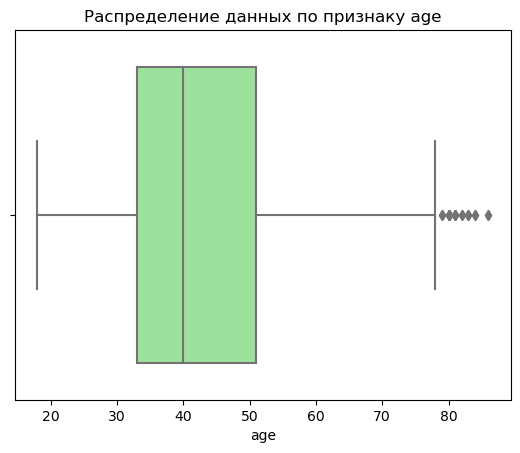

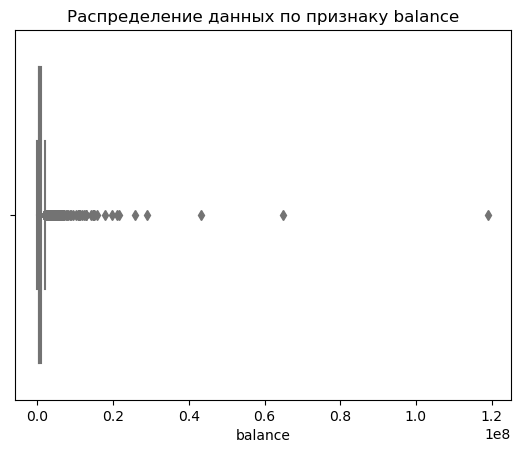

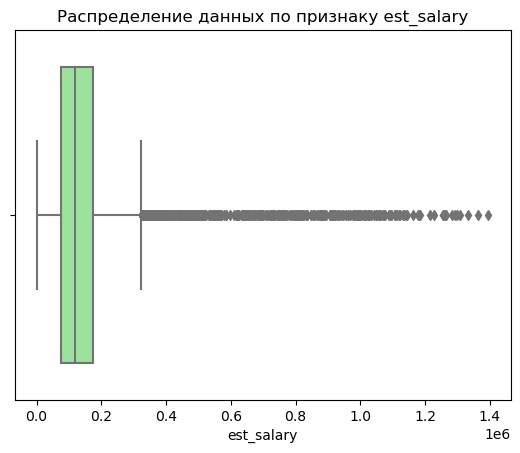

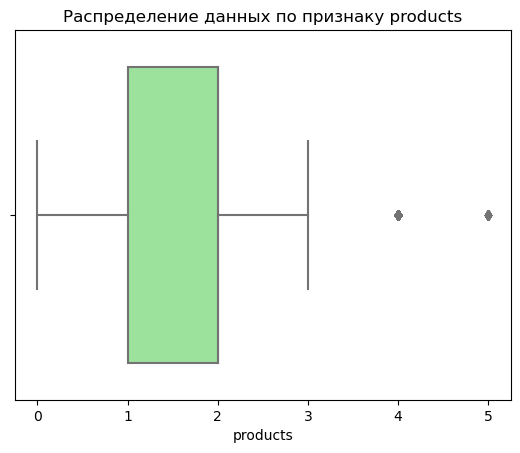

In [26]:
# Проверим на наличие выбросов столбцы с возрастом, балансом на счёте и доходами клиентов.
# Построим диаграммы размаха по каждому из этих признаков

for column in ['age', 'balance', 'est_salary', 'products', ]:
    plt.figure()
    sns.boxplot(x=column,
                data=data,
                color='lightgreen')
    plt.title(f'Распределение данных по признаку {column}')
    plt.show()

Диаграмма размаха показала, что клиенты старше 78 лет - это аномалия. Так же клиенты с балансом свыше 1 000 000 являются аномалиями. У признака "количество продуктов, которыми пользуется клиент" так же диаграмма размаха показала выбросы, их нужно исследовать. Далее посмотрим процент таких клиентов, от общего числа.
По диаграмме размаха доходов клиентов также прослеживаются выбросы после 350 000. 
Также дополнительно необходимо изучить минимальные значения в столбце доход.

In [27]:
# Посмотрим процент клиентов старше 78 лет
print('Количество клиентов старше 78 лет:', len(data.query('age > 78')))
print('Процент от общего числа:', round(len(data.query('age > 78'))/len(data)*100, 2))

# Посмотрим процент клиентов с количеством продуктов более 3
print('\nКоличество клиентов с числом продуктов более 3:', len(data.query('products > 3')))
print('Процент от общего числа:',len(data.query('products > 3'))/len(data)*100)

# Посмотрим процент клиентов с количеством продуктов более 4
print('\nКоличество клиентов с числом продуктов более 4:', len(data.query('products > 4')))
print('Процент от общего числа:',len(data.query('products > 4'))/len(data)*100)

# Посмотрим процент клиентов с количеством продуктов менее 1
print('\nКоличество клиентов с числом продуктов менее 1:', len(data.query('products < 1')))
print('Процент от общего числа:',len(data.query('products < 1'))/len(data)*100)

# Посмотрим процент клиентов с доходами более 350 000
print('\nКоличество клиентов с доходами более 350 000:', len(data.query('est_salary > 350000')))
print('Процент от общего числа:',len(data.query('est_salary > 350000'))/len(data)*100)

# Посмотрим процент клиентов со средствами на балансе более 1 000 000
print('\nКоличество клиентов с балансом выше 1 000 000:', len(data.query('balance > 1000000')))
print('Процент от общего числа:',len(data.query('balance > 1000000'))/len(data)*100)

# Посмотрим еще раз отдельно описательную статистику для столбцов с балансом и доходами
print('\nОписательная статистика столбца с балансом\n', data['balance'].describe())
print('\nОписательная статистика столбца с доходами\n', data['est_salary'].describe())

Количество клиентов старше 78 лет: 22
Процент от общего числа: 0.22

Количество клиентов с числом продуктов более 3: 493
Процент от общего числа: 4.968255567872619

Количество клиентов с числом продуктов более 4: 19
Процент от общего числа: 0.19147435251436057

Количество клиентов с числом продуктов менее 1: 1
Процент от общего числа: 0.01007759750075582

Количество клиентов с доходами более 350 000: 409
Процент от общего числа: 4.12173737780913

Количество клиентов с балансом выше 1 000 000: 1866
Процент от общего числа: 18.80479693641036

Описательная статистика столбца с балансом
 count   7,663.00      
mean    828,248.16    
std     1,984,247.69  
min     0.00          
25%     295,498.98    
50%     524,961.22    
75%     980,801.49    
max     119,113,552.01
Name: balance, dtype: float64

Описательная статистика столбца с доходами
 count   9,923.00    
mean    147,886.49  
std     139,363.90  
min     2,546.30    
25%     75,252.12   
50%     119,719.33  
75%     174,673.28  
max

Клиенты старше 78 лет составляют всего 0,22%. Клиенты старшего возраста нормальное явление, 22 человека не исказят датасет из 10 тысяч строк. Оставляем взрослых клиентов в датасете.
<br>Количество клиентов с числом продуктов более 4 - 19 человек (0,19 %), менее 1 - 1 человек. Удалим выбросы.
<br>Клиентов с балансом выше 1 000 000 т.р. более 1800 (18,8%). Стандартное отклонение, характеризующее разброс величин, показывает, что значения в датасете сильно отличаются от среднего арифметического, они неоднородны. Выбросы в размере 18,8 % датасета это много, но значения выбросов могут исказить результаты исследования. 
<br>Число клиентов с высокими доходами - 409 (4,2% датасета). Преполагаем, что это очень богатые клиенты.

Главная задача изучения выбросов - чтобы дальнейший анализ был без искажений. Клиенты с очень высоким доходом могут исказить результаты исследования. Исключать клиентов с аномально высокими доходами совсем из исследования нецелесообразно. Выделим их в отдельный датасет vip, чтобы исследовать отдельно.

In [28]:
# Удалим строки, в которых число продуктов более 4 и меньше 1
data = data[(data['products'] >= 1) & (data['products'] < 5)]
data.info()

# Создадим датасет vip
vip = data.query('est_salary > 350000')

print('\nVip-клиенты\n')
vip.info()
print(vip['est_salary'].describe())

# Созданим датасет без учёта vip
data2 = data.query('est_salary < 350000')
print('\nДатасет без Vip-клиентов\n')
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9903 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   userid         9903 non-null   int64  
 1   score          9903 non-null   int64  
 2   city           9903 non-null   object 
 3   gender         9903 non-null   object 
 4   age            9903 non-null   float64
 5   equity         9903 non-null   int64  
 6   balance        7644 non-null   float64
 7   products       9903 non-null   int64  
 8   credit_card    9903 non-null   int64  
 9   last_activity  9903 non-null   int64  
 10  est_salary     9903 non-null   float64
 11  churn          9903 non-null   int64  
 12  type_balance   9903 non-null   object 
dtypes: float64(3), int64(7), object(3)
memory usage: 1.1+ MB

Vip-клиенты

<class 'pandas.core.frame.DataFrame'>
Int64Index: 409 entries, 30 to 9984
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  -

Рассмотрим клиентов с доходами ниже 25-го перцентиля, чтобы выявить выбросы / аномальные значения в датасете.

In [29]:
# посмотрим числовое описание данных в столбе с доходами
data2['est_salary'].describe()

count   9,494.00  
mean    124,982.88
std     67,328.23 
min     2,546.30  
25%     73,535.66 
50%     115,986.60
75%     166,743.39
max     349,512.73
Name: est_salary, dtype: float64

Зарплатный минимум у клиента равный 2 546,30 похож на выброс. Посмотрим, сколько еще в датасете значений ниже 25-го перцентиля.

In [30]:
# Посмотрим, сколько клиентов получют доход ниже 25-го перцентиля
data2.query('est_salary < est_salary.quantile(q=.25)').sort_values(by='est_salary')

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,type_balance
8783,114221,948,Ярославль,Ж,26.00,1,"77,092.89",1,1,0,"2,546.30",0,1
2186,201407,938,Рыбинск,Ж,69.00,1,"325,483.52",3,0,1,"3,487.33",0,1
1753,161271,836,Ярославль,Ж,19.00,4,"7,703.05",4,1,1,"5,043.14",0,1
4860,193417,823,Ростов,Ж,64.00,2,"277,249.69",2,0,0,"5,341.50",0,1
1700,155567,747,Ростов,М,25.00,0,"5,750.92",1,1,0,"7,054.82",0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
660,145241,845,Ярославль,Ж,36.00,5,"805,755.81",1,1,0,"73,411.81",0,1
7346,144083,871,Ярославль,Ж,29.00,6,"473,472.12",1,1,1,"73,443.09",1,1
2324,174831,836,Рыбинск,М,51.00,3,"865,569.48",1,1,1,"73,479.30",0,1
853,118102,932,Рыбинск,Ж,25.00,0,NaN,1,1,1,"73,489.66",0,0


2374 клиент с доходами ниже 73 тысяч. Изучим подробнее клиентов с самыми низкими доходами, чтобы понять выбросы ли это

In [31]:
data2.query('est_salary < est_salary.quantile(q=.25)').sort_values(by='est_salary').head(15)

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,type_balance
8783,114221,948,Ярославль,Ж,26.00,1,"77,092.89",1,1,0,"2,546.30",0,1
2186,201407,938,Рыбинск,Ж,69.00,1,"325,483.52",3,0,1,"3,487.33",0,1
1753,161271,836,Ярославль,Ж,19.00,4,"7,703.05",4,1,1,"5,043.14",0,1
4860,193417,823,Ростов,Ж,64.00,2,"277,249.69",2,0,0,"5,341.50",0,1
1700,155567,747,Ростов,М,25.00,0,"5,750.92",1,1,0,"7,054.82",0,1
3689,219561,817,Ростов,М,25.00,3,"121,065.39",4,1,1,"7,522.14",0,1
3606,187819,839,Рыбинск,Ж,56.00,5,"1,027,438.02",2,0,0,"7,571.80",0,1
2174,143340,830,Ярославль,Ж,72.00,2,"294,375.63",3,1,1,"8,032.18",0,1
9124,148483,811,Ярославль,Ж,75.00,5,"542,971.64",3,1,1,"8,226.26",0,1
9365,171110,788,Рыбинск,Ж,76.00,2,"223,228.01",2,0,0,"8,260.33",0,1


Мы видим, что в основном низкие доходы у клиентов или старшего / пенсионного возраста, или у молодежи. Доходом может считаться не только зарплата, но и социальные выплаты (пенсия / стипендия / материальная помощь от государства / декретные выплаты и тому подобное) или проценты по вкладам. Стоит учесть, что данные о доходе также могут быть недостоверные. Оставим эти данные как есть.

**Вывод по разделу Предобработка данных:**
<br>На этапе предобработки данных были изменены названия столбцов на snake_case, типы данных в столбцах приведены к нужно виду в соответствие с содержимым. Изучены дубликаты и выбросы в данных, пропуски в столбце баланс во взаимосвязи с данными других столбцов. Так как установить взаимосвязь между пропусками не удалось, принято решение оставить пропуски без изменений, не заменять их синтетическими значениями, чтобы не исказить дальнейший анализ.
<br>В датасете после предобработк осталось оставлось 95% данных.
<br>Данные готовы к дальнейшему анализу.

<br>[Вернуться в начало](#Start)
<br>[Вернуться к плану работы](#Plan)
<br>[Вернуться к описанию данных](#description)

## Исследовательский анализ данных

<a id='10'></a>
### Общий портрет клиентов

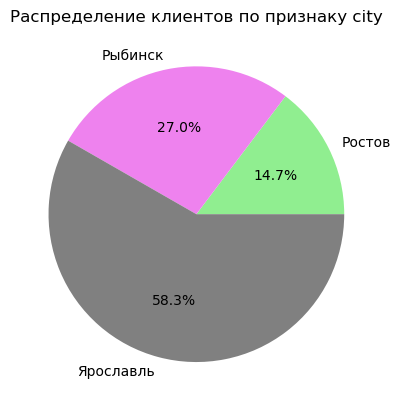

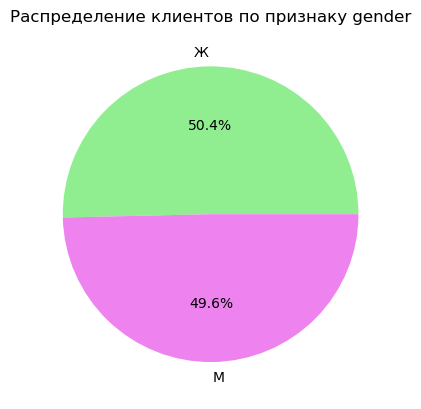

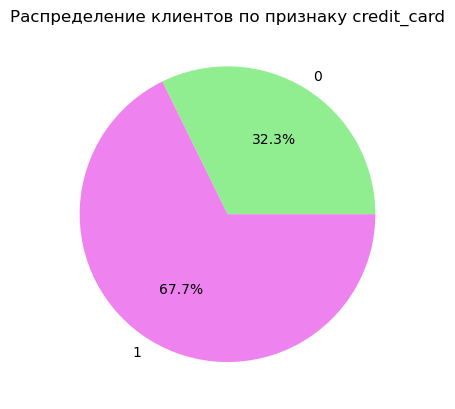

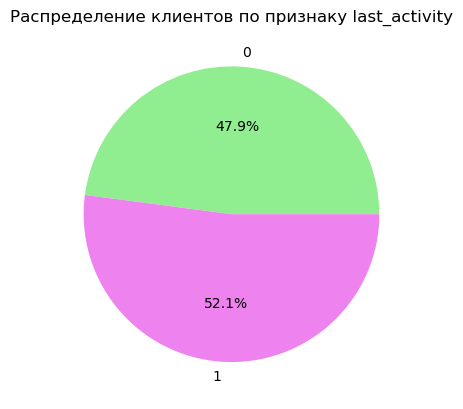

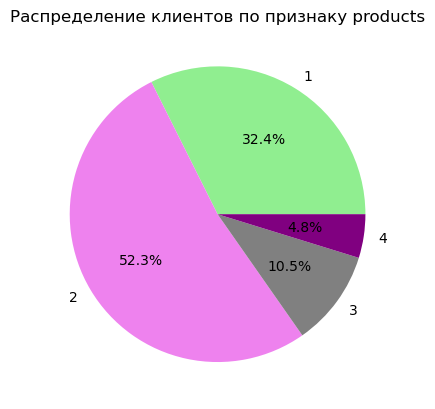

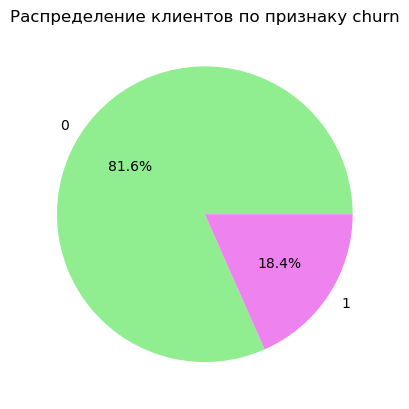

In [32]:
# в цикле на круговых диаграмах изучим распределение клиентов по условным признакам и с дискретными значениями:
# город, пол, наличие кредитной карты, активность, число банковских продуктов и отток

for column in ['city','gender','credit_card','last_activity', 'products','churn']:
    df = data2.groupby(column).agg({'userid': 'count'})
    fig1,ax1 = plt.subplots()
    ax1.pie(
        df['userid'],
        labels=df.index,
        autopct='%1.1f%%',
        colors = ['lightgreen', 'violet', 'gray', 'purple'])
    ax1.set_title(f'Распределение клиентов по признаку {column}')
    plt.show()

Большинство клиентов банка "Метанпром" обслуживаются в филиале в городе Ярославль (почти 59 %), клиентов по гендеру поровну мужчин и женщин, большинство клиентов имеют кредитную карту (почти 68%), чуть больше половины клиентов активны и пользуются двумя банковскими продуктами, отток составляет 18,4 %.

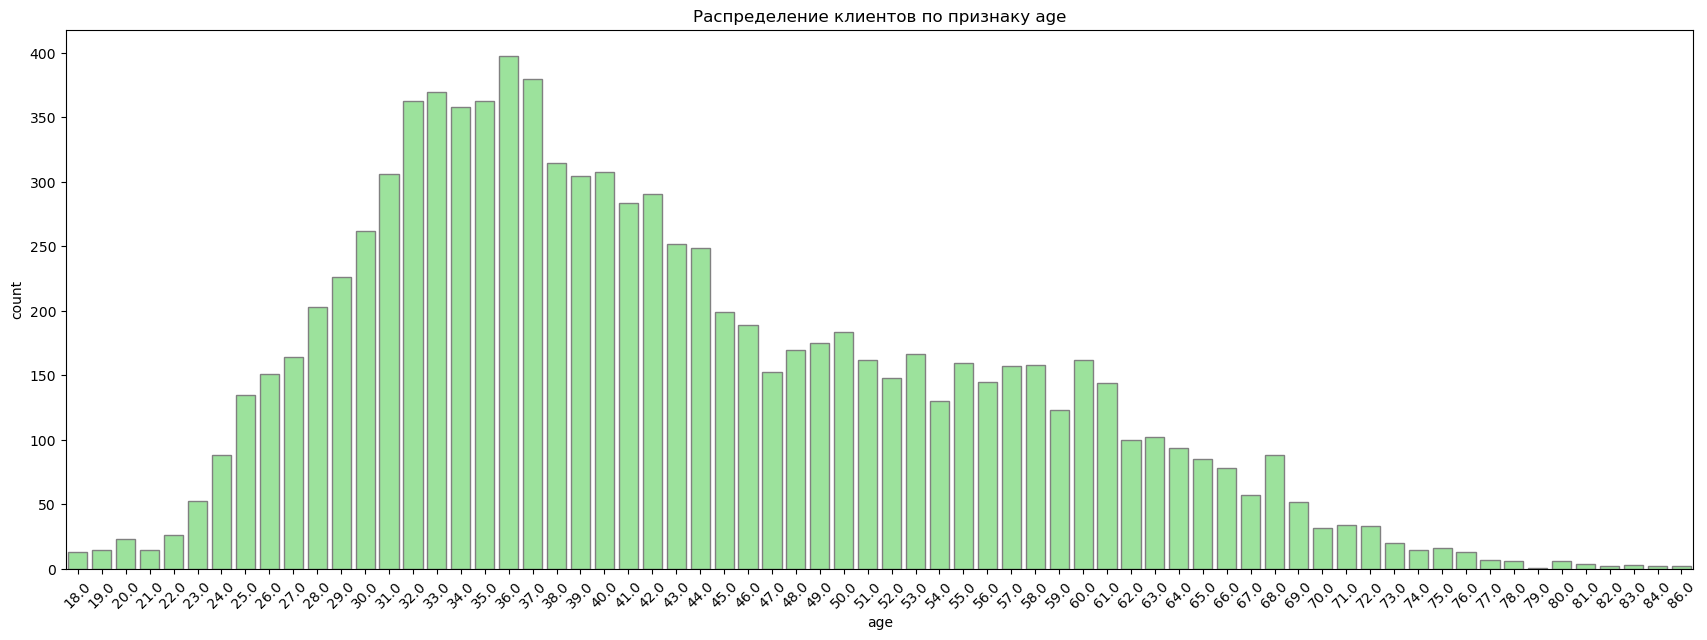

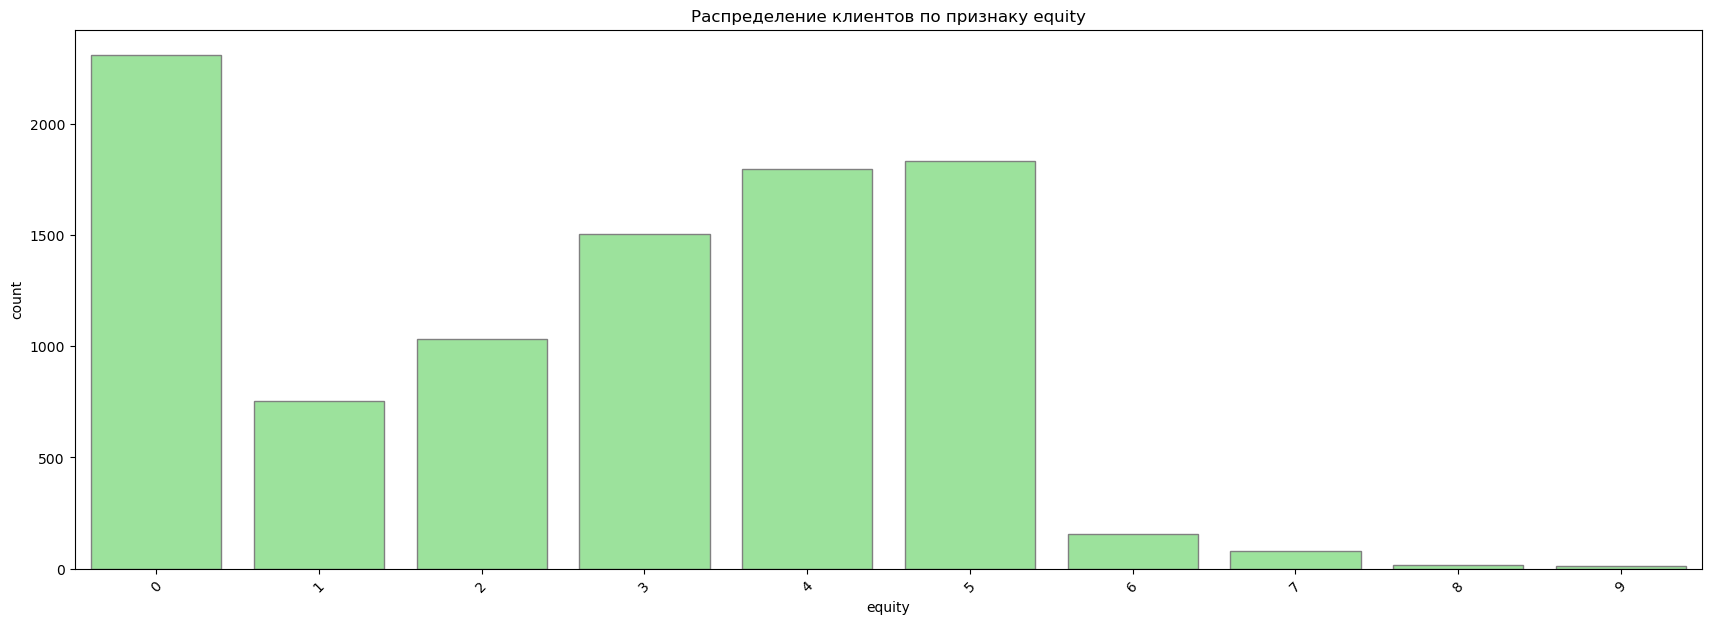

In [33]:
# в цикле на гистограмах изучим распределение клиентов по переменным с дискретными значениями:
# возраст и количество объектов в собственности
for column in ['age','equity']:
    plt.figure(figsize=(21,7))
    sns.countplot(data2[column], color = 'lightgreen', edgecolor='gray')
    plt.title(f'Распределение клиентов по признаку {column}')
    plt.xticks(rotation=45) # повернём подписи по оси X на 45 градусов
    plt.show()

По гистограммам видно, что возраст клиентов банка "Метанпром" имеет пик на 32-40 лет.
<br>Больше четверти клиентов не имеют в собственности объектов, также значительная часть распоряжается от 1 до 5 объектами.

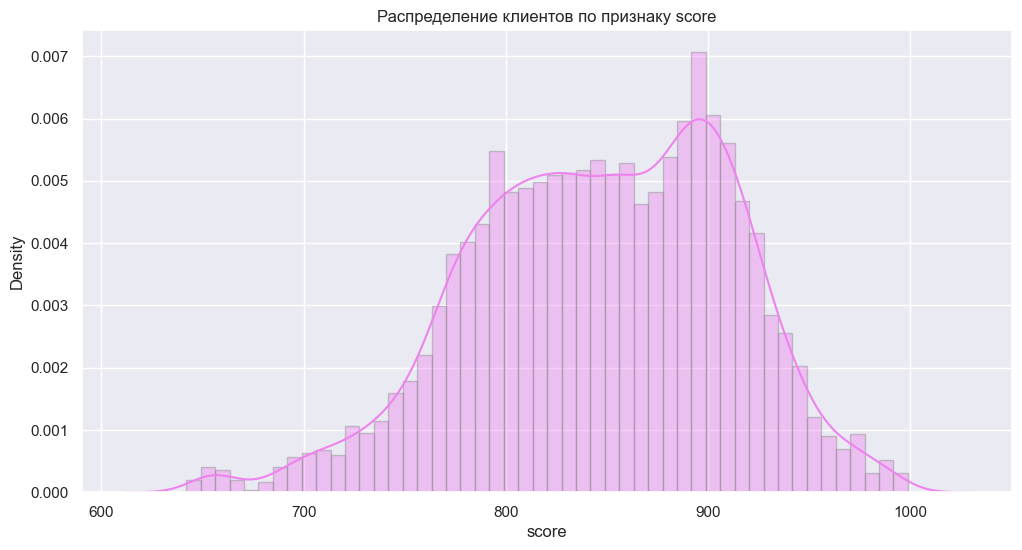

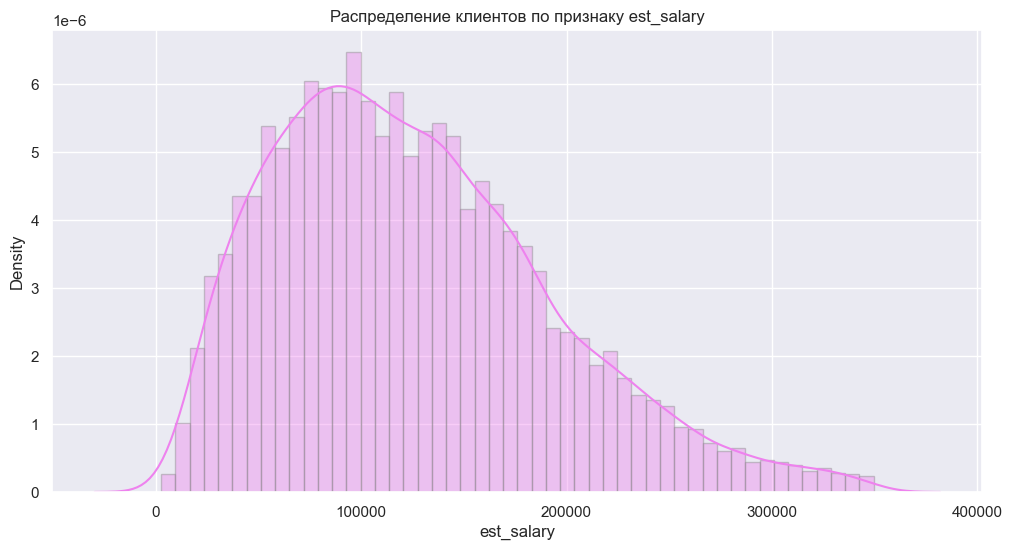

In [34]:
# в цикле на гистограммах изучим распределение клиентов по переменным c непрерывными значениями:
# скорринговый балл и доход
for column in ['score', 'est_salary']:
    sns.set(rc={'figure.figsize':(12,6)})
    sns.distplot(data2[column], hist=True,  bins=50, color = 'violet', hist_kws={'edgecolor':'gray'})
    plt.title(f'Распределение клиентов по признаку {column}')
    plt.show()

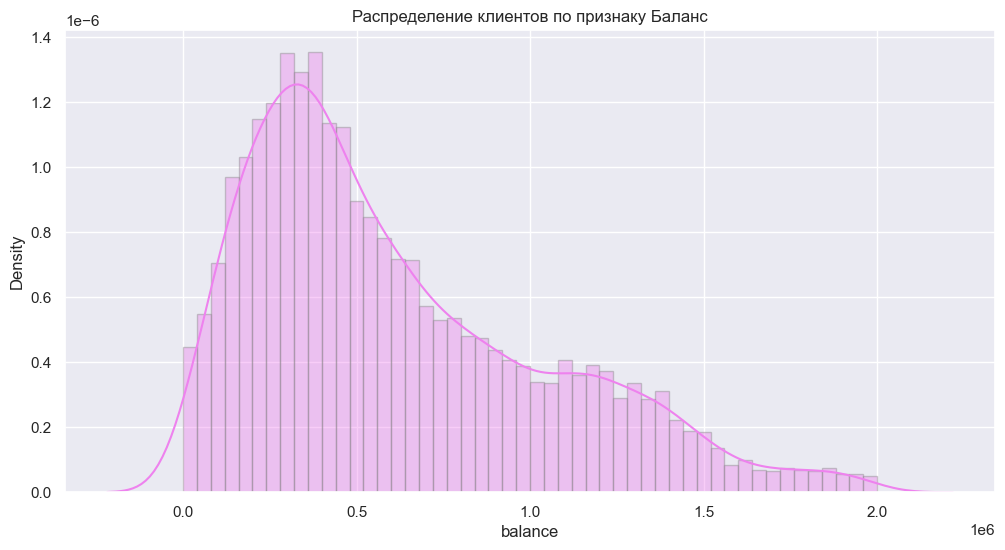

In [35]:
# для исключения смещения на графике из-за больших значений по балансу, исключим выбросы более 2 000 000
data_no_balance=data2[(data2['balance'] < 2000000)] # исключаем тех клиентов, у кого на балансе больше 2 000 000
sns.set(rc={'figure.figsize':(12,6)})
sns.distplot(data_no_balance['balance'], hist=True,  bins=50, color = 'violet', hist_kws={'edgecolor':'gray'})
plt.title(f'Распределение клиентов по признаку Баланс')
plt.show()

На гистограммах выше видим, что клиенты банка имеют в основном высокие баллы кредитного скорринга - от 760 до 940.
<br>Значительная часть клиентов с балансом на счёте около 400 000.
<br>На гистограмме распределения значений доходов клиентов пик приходится на 100 тысяч.

**Вывод "Общий портрет клиентов"**

По данным выше мы можем предварительно составить достаточно обобщенный портрет клиента банка: мужчин и женщин поровну, почти 68% клиентов имеют кредитную карту, чуть больше половины клиентов активны, клиенты в основном надежные и значительная часть имеют баллы кредитного скоррингана уровне 760-940, средние доходы клиентов составляют 80 - 130 тысяч, в среднем на счете ооло 400 тысяч. Большинство клиентов находятся в Ярославле (58,3% клиентов), в Рыбинске в 2 раза меньше (27% клиентов) и Ростове - чуть более 14%. Вероятность ухода / оттока клиента - 18,4 %. 

Анализ оттока клиентов позволяет вовремя принять меры, улучшить продукт и клиентский сервис. 

<a id='11'></a>
### Признаки отточных клиентов 

Посмотрим на средние значения признаков по условию оттока

In [36]:
data2.drop('userid', axis=1).groupby(by='churn').mean().round(2)

,score,age,equity,balance,products,credit_card,last_activity,est_salary
churn,,,,,,,,
0,844.08,43.05,2.44,"670,442.13",1.77,0.71,0.48,"123,805.76"
1,861.00,41.48,3.74,"999,365.54",2.36,0.55,0.70,"130,213.80"


1. Похожие признаки у ушедших и оставшихся клиентов:
- средние баллы кредитного скоринга 844-861
- средний возраст клиентов 41-43
- количество объектов в собственности 2-4
- число используемых банковских продуктов - в среднем 2
- доходы 123-130 тысяч

2. Признаки, существенно отличающиеся:
- остаток на балансе у ушедших в среднем в 1,5 больше, чем у оставшихся
- число ушедших активных клиентов в 1,5 больше активных оставшихся
- оставшиеся клиенты на 30% чаще пользуются кредитками

Теперь проанализируем отток по неохваченным итерацией выше признакам: по городам и гендеру.

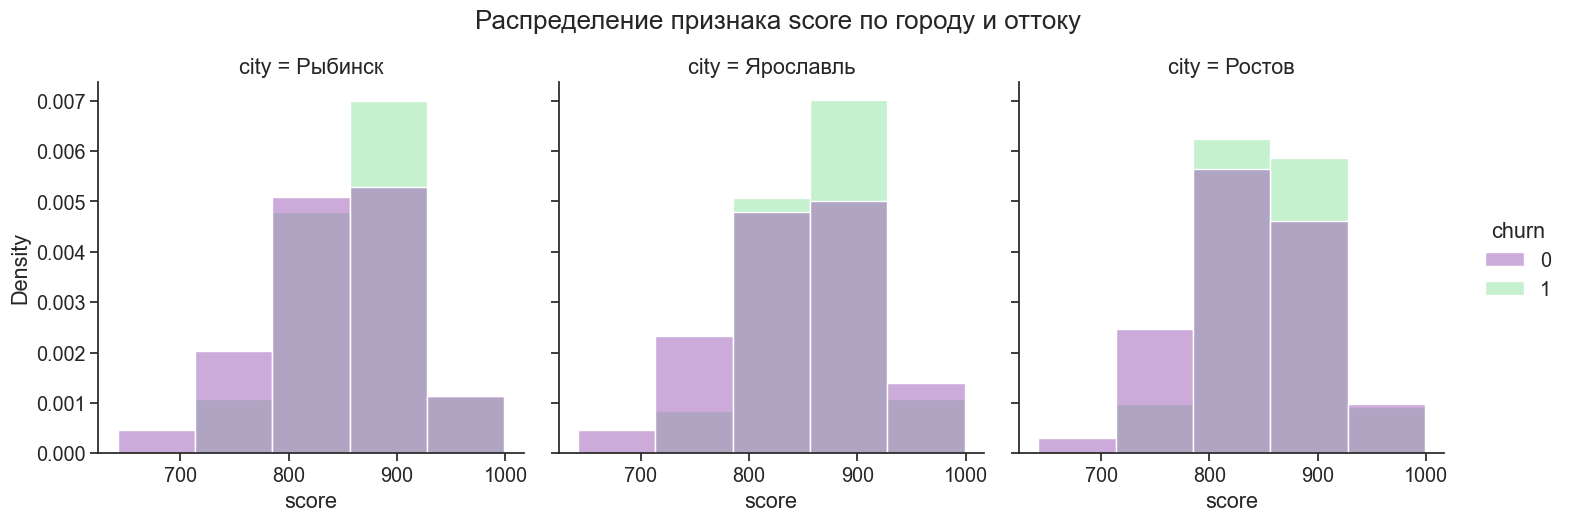

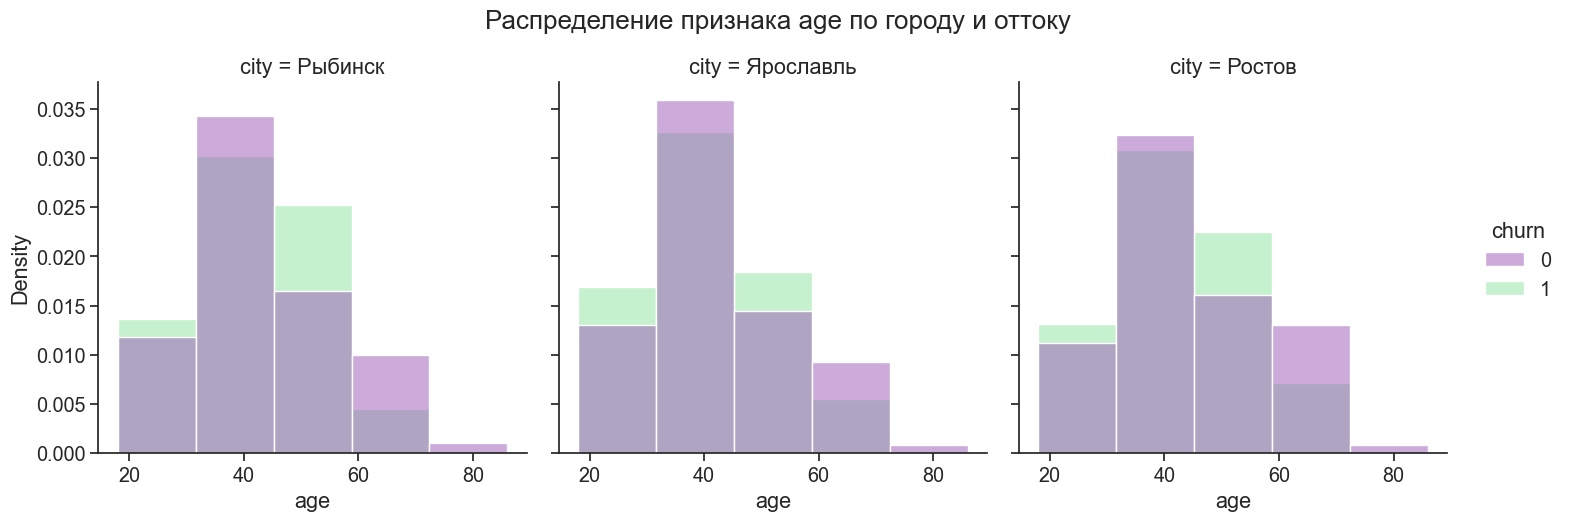

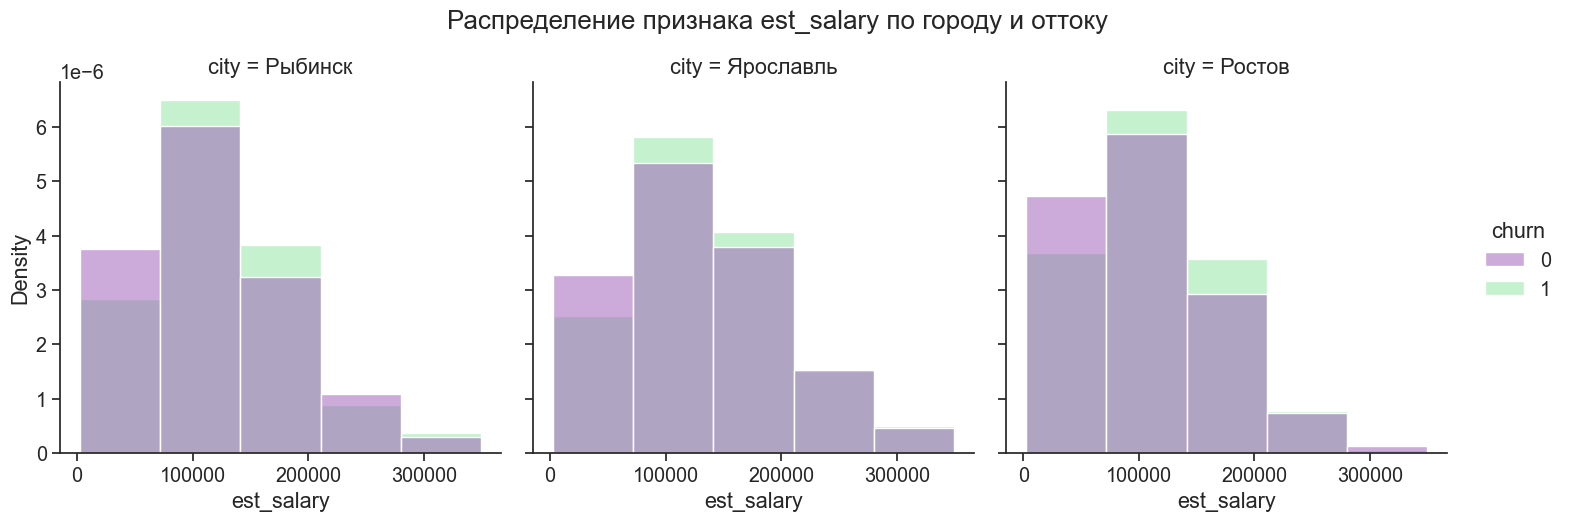

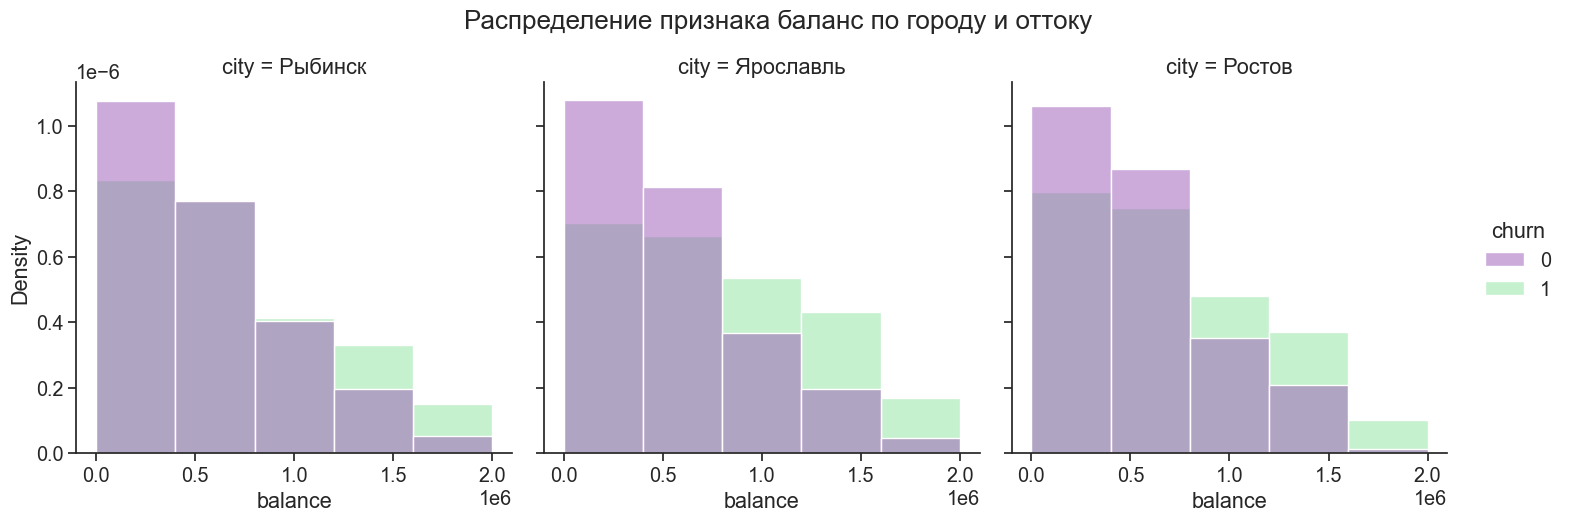

In [37]:
# Посмотрим на гистограммах распределение непрерывных признаков в разрезе городов и критерия оттока клиента:
# рейтинг,возраст,доход

# Определим цвет графиков
palette = ['#9b59b6', '#8de5a1']
sns.set_theme(style="ticks", font_scale=1.3)

# Цикл для формирования графиков распределения (hue- критерий, по которому хотим увидеть детализацию данных)
for column in ['score', 'age', 'est_salary']:
    sns.displot(x=column,
                col='city',
                hue='churn',
                bins=5,
                kde=False, 
                stat="density",
                common_norm=False,
                palette=palette,
                data=data2)
    plt.suptitle(f"Распределение признака {column} по городу и оттоку", y=1.05) 
    

# построим график по балансу, исключим клиентов, у которых на балансе более 2 000 000
palette = ['#9b59b6', '#8de5a1']
sns.set_theme(style="ticks", font_scale=1.3)
sns.displot(x='balance',
            col='city',
            hue='churn',
            bins=5,
            kde=False, 
            stat="density",
            common_norm=False,
            data=data_no_balance,
            palette=palette)
plt.suptitle(f"Распределение признака баланс по городу и оттоку", y=1.05)
plt.show();

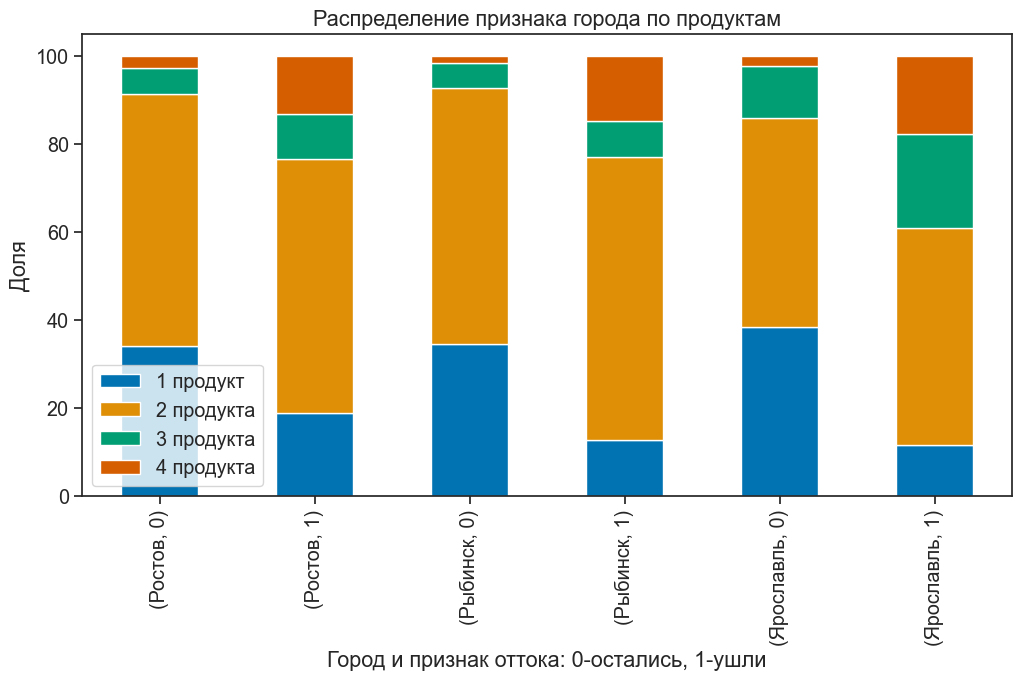

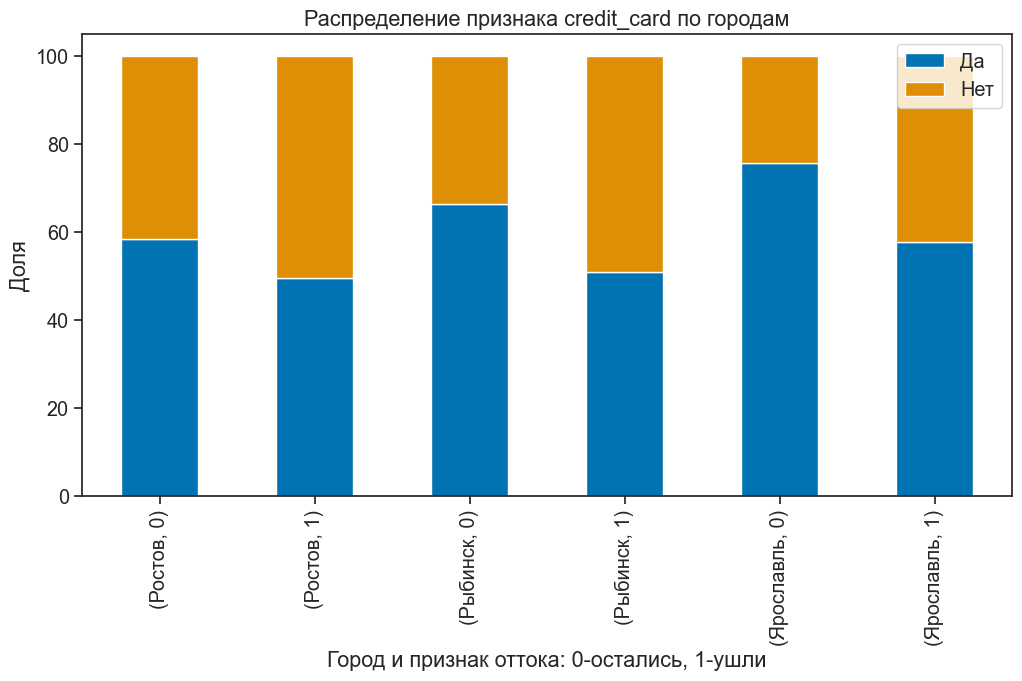

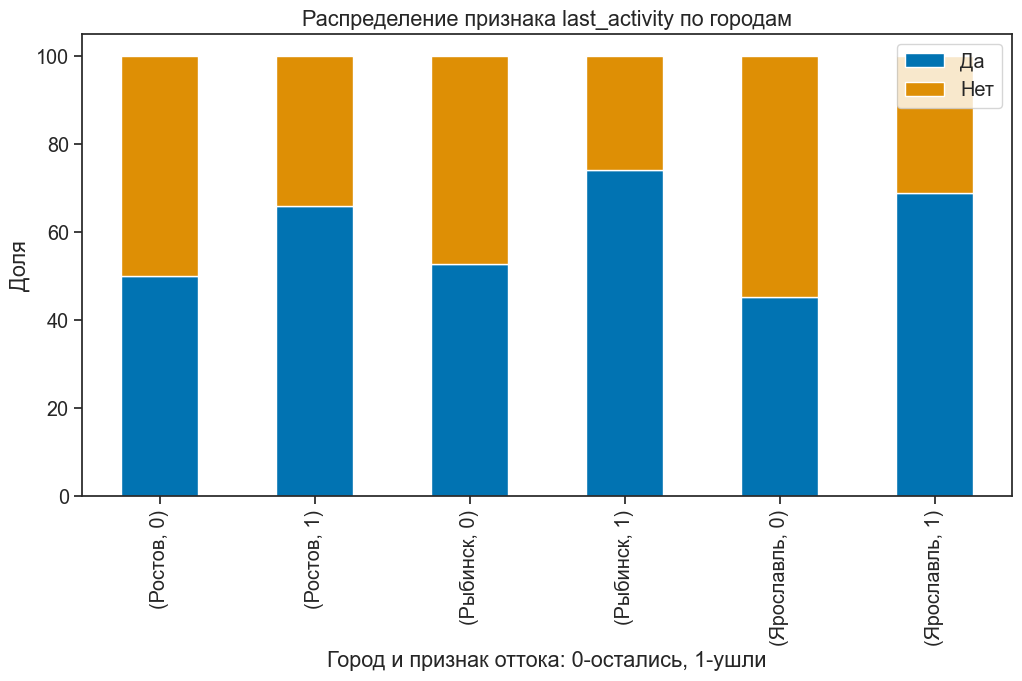

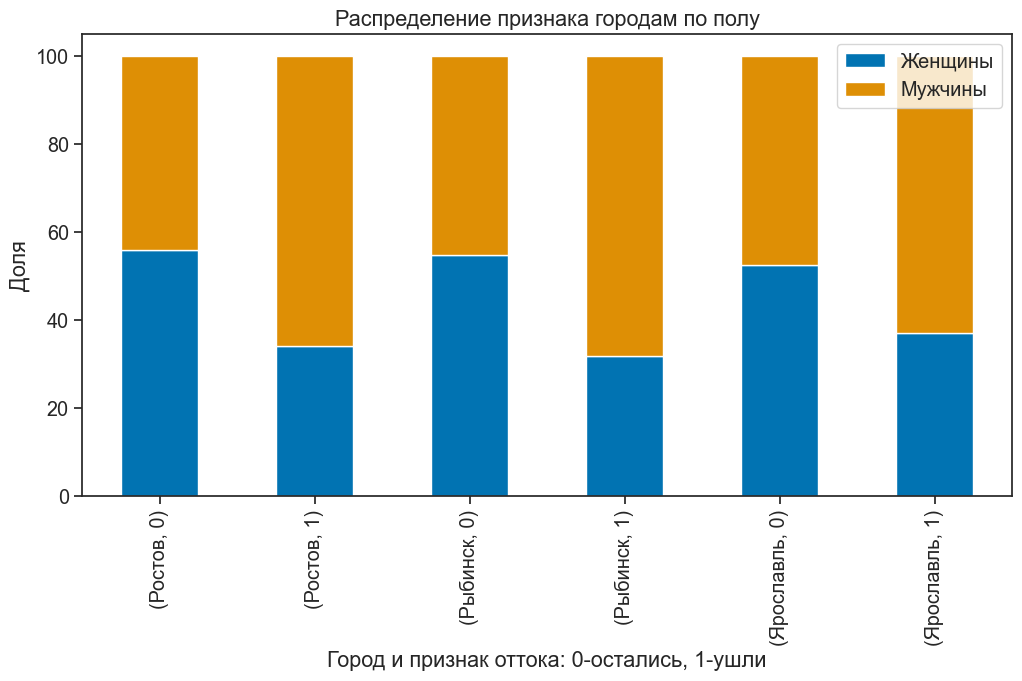

In [38]:
# Посмотрим на столбчатых диаграммах по долям распределение категорийных переменных в разрезе городов:
# 1. по количетву продуктов (products):
# Создадим сводную таблицу, в которой отразим число клиентов по городам и продуктам:
category_city=data2.pivot_table(index=['city','churn'], columns='products', values='userid', aggfunc='count')
category_city.columns=['1', '2', '3', '4']
category_city['1 продукт']=(category_city['1']/(category_city['1']+category_city['2']+category_city['3']+category_city['4'])*100).round(2)
category_city['2 продукта']=(category_city['2']/(category_city['1']+category_city['2']+category_city['3']+category_city['4'])*100).round(2)
category_city['3 продукта']=(category_city['3']/(category_city['1']+category_city['2']+category_city['3']+category_city['4'])*100).round(2)
category_city['4 продукта']=(category_city['4']/(category_city['1']+category_city['2']+category_city['3']+category_city['4'])*100).round(2)
category_city=category_city.drop(columns=['1', '2', '3', '4'])

# Построим столбчатую диаграмму с разделением по по городам и продуктам:
sns.set_palette('colorblind')
category_city.plot(kind = 'bar',
              stacked = True, 
              figsize = (12,6)),
plt.title(f"Распределение признака города по продуктам")
plt.xlabel('Город и признак оттока: 0-остались, 1-ушли')
plt.ylabel('Доля');

# 2. по наличию кредитки, активность
# Создадим цикл, в котором подготовим данные для графиков и построим их:
for column in ['credit_card','last_activity']:
# Создадим сводную таблицу, в которой отразим число клиентов по городам и признакам:
    category_1 = data2.pivot_table (index = ['city','churn'], columns = column, values = 'userid', aggfunc = 'count')
    category_1.columns = ['00', '11']
    #display(category_1)
    
# Рассчитаем доли клиентов по признакам: 
    category_1 ['Да'] = (category_1['11']/(category_1['00']+category_1['11'])*100).round(2)
    category_1 ['Нет'] = (category_1['00']/(category_1['11']+category_1['00'])*100).round(2)
    category_1=category_1.drop(columns=['00', '11'])
    
# Построим столбчатую диаграмму с разделением по городам и признакам клиентов:
    sns.set_palette('colorblind')
    category_1.plot(kind = 'bar', stacked = True, figsize = (12,6))
    plt.title(f"Распределение признака {column} по городам")
    plt.xlabel('Город и признак оттока: 0-остались, 1-ушли')
    plt.ylabel('Доля');

# 3. пол (gender)
# Создадим сводную таблицу, в которой отразим число клиентов по продуктам и гендеру:
category_gender=data2.pivot_table(index=['city','churn'], columns='gender', values='userid', aggfunc='count')
category_gender.columns=['0', '1']
category_gender['Женщины']=(category_gender['0']/(category_gender['0']+category_gender['1'])*100).round(2)
category_gender['Мужчины']=(category_gender['1']/(category_gender['0']+category_gender['1'])*100).round(2)
category_gender=category_gender.drop(columns=['0', '1'])

# Построим столбчатую диаграмму с разделением по городам и полу:
sns.set_palette('colorblind')
category_gender.plot(kind = 'bar',
              stacked = True, 
              figsize = (12,6)),
plt.title(f"Распределение признака городам по полу")
plt.xlabel('Город и признак оттока: 0-остались, 1-ушли')
plt.ylabel('Доля');

По итогам изучения графиков распределения признаков по городам и оттоку видим, что в целом, в городах ситуация с уходом клиентов одинаковая:
- несмотря на достаточно большое число клиентов с высоким скорринговым баллом в банке "Метанпром", благонадёжных клиентов с уровнем порядка 800 баллом уходит больше
- доля ушедших мужчин больше по сравнению с женщинами, особенно в Рыбинске и Ростове
- возраст большего числа ушедших клиентов около 40 лет
- чаще уходят клиенты с 4-5 объектами в собственности и пользующиеся 2-мя банковскими продуктами (В Ярославле до 4-х продуктов)
- в Ярославле клиенты, имеющие кредитную карту уходят чаще, в Ростове и Рыбинске клиенты с кредитной картой и без уходят одинаково часто
- активные клиенты во всех трёх городах присутствия банка уходят чаще, чем неактивные
- клиенты с доходами до 260 тысяч склонны к оттоку больше тех, чьи доходы выше
- доля отточных клиентов по всем  трем городам примерно одинакова.

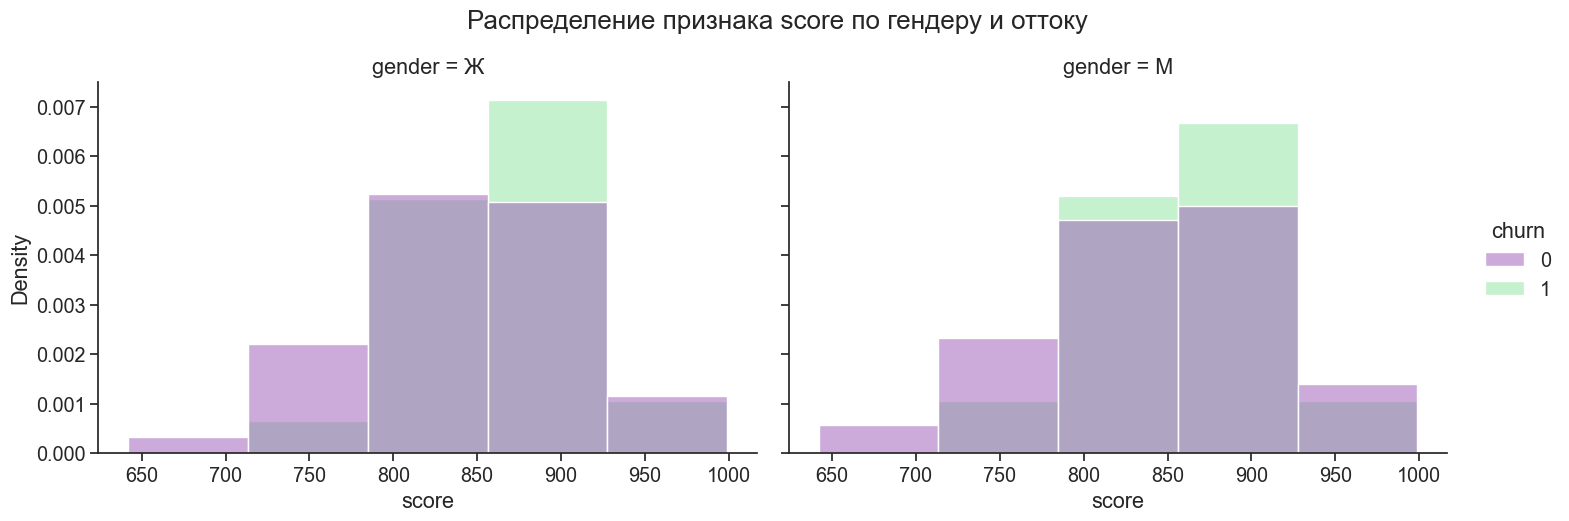

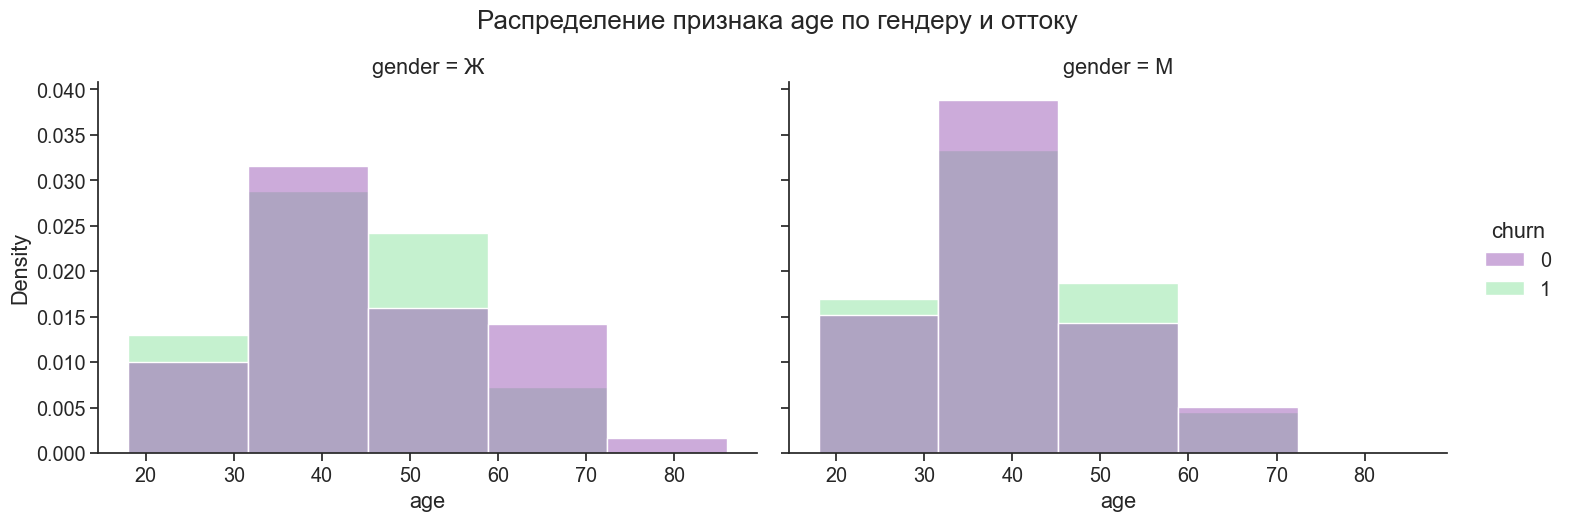

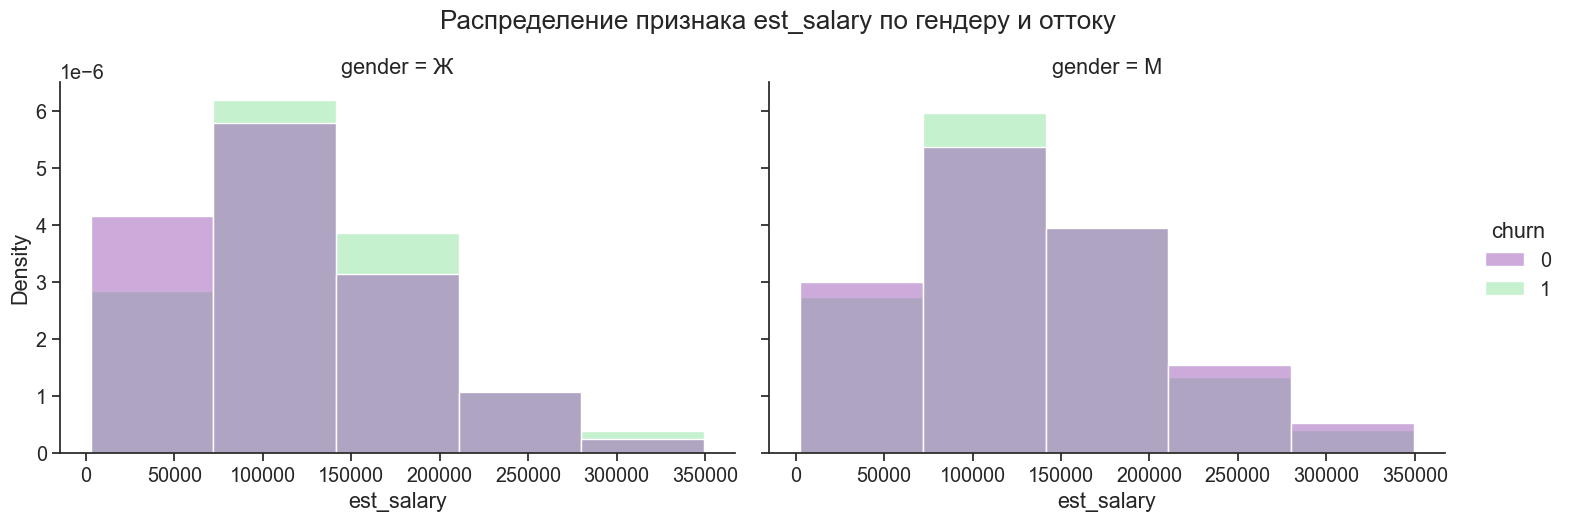

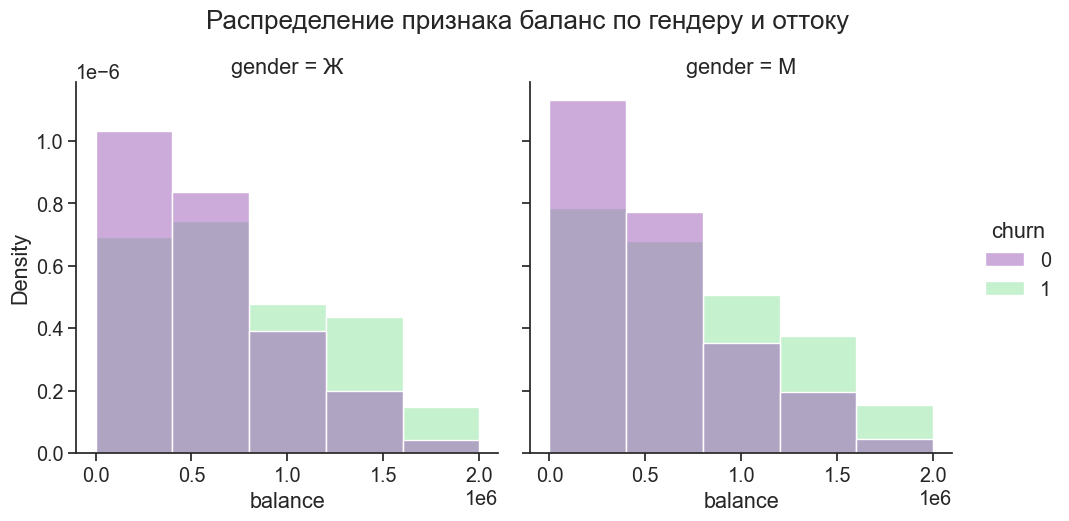

In [39]:
# Посмотрим на гистограммах распределение непрерывны признаков в разрезе гендера и критерия оттока клиента:
# рейтинг,возраст,доход
  
# Определим цвет графиков
palette = ['#9b59b6', '#8de5a1']
sns.set_theme(style="ticks", font_scale=1.3)

# Цикл для формирования графиков распределения (hue- критерий, по которому хотим увидеть детализацию данных)
for column in ['score', 'age', 'est_salary']:
    sns.displot(x=column,
                col='gender',
                hue='churn',
                bins=5,
                kde=False, 
                stat="density",
                common_norm=False,
                palette=palette,
                aspect=1.5,
                data=data2)
    plt.suptitle(f"Распределение признака {column} по гендеру и оттоку", y=1.05)
    
# построим график по балансу, исключим клиентов, у которых на балансе более 2 000 000
palette = ['#9b59b6', '#8de5a1']
sns.set_theme(style="ticks", font_scale=1.3)
sns.displot(x='balance',
            col='gender',
            hue='churn',
            bins=5,
            kde=False, 
            stat="density",
            common_norm=False,
            data=data_no_balance,
            palette=palette)
plt.suptitle(f"Распределение признака баланс по гендеру и оттоку", y=1.05)
plt.show();

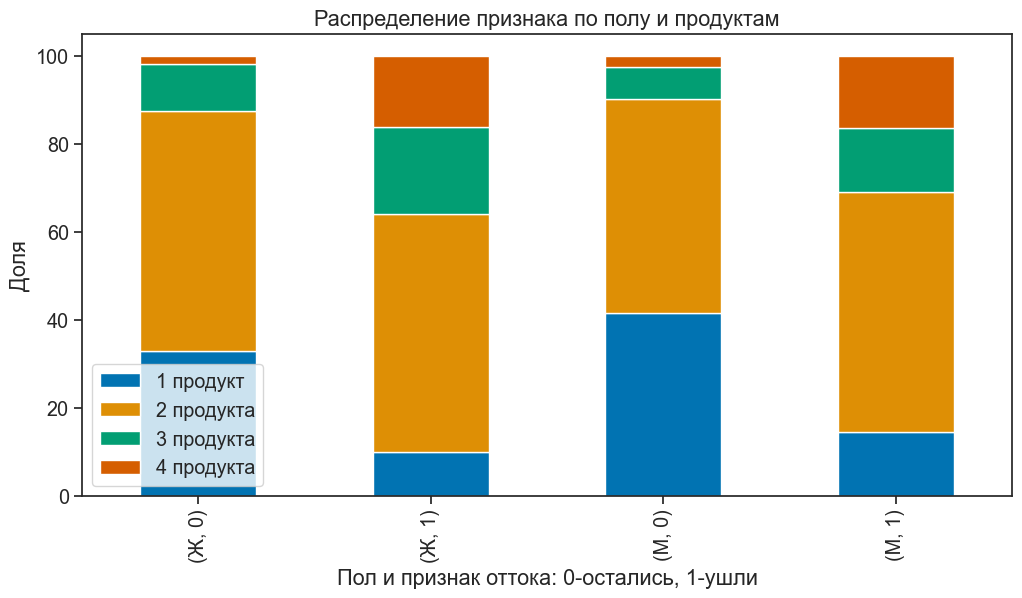

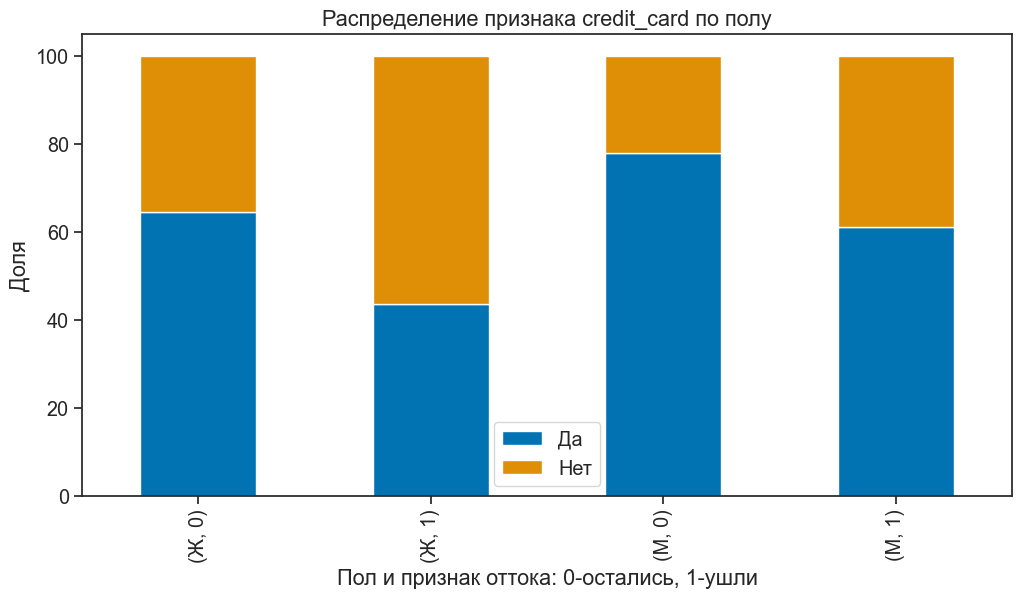

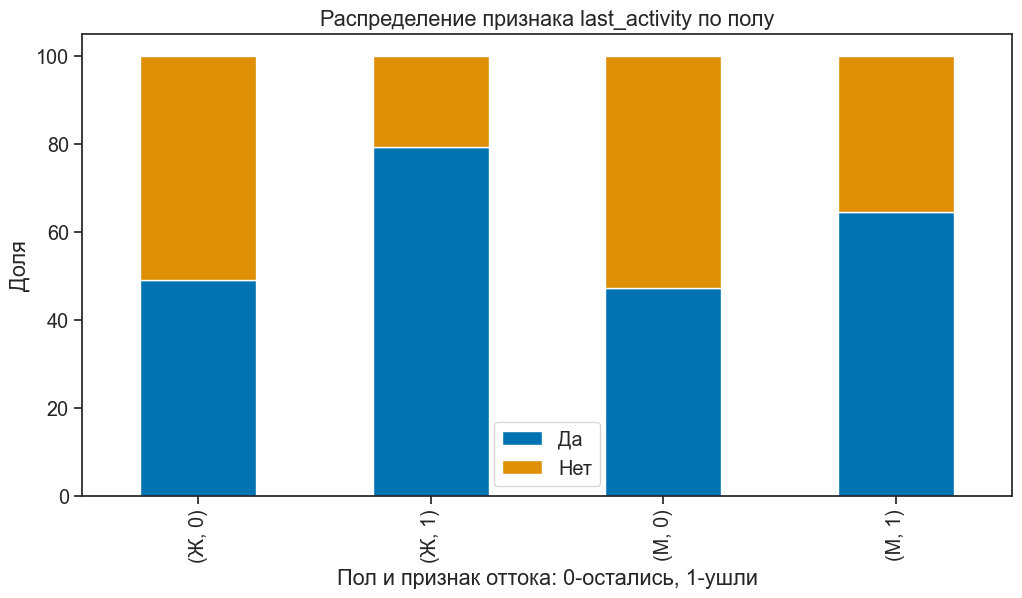

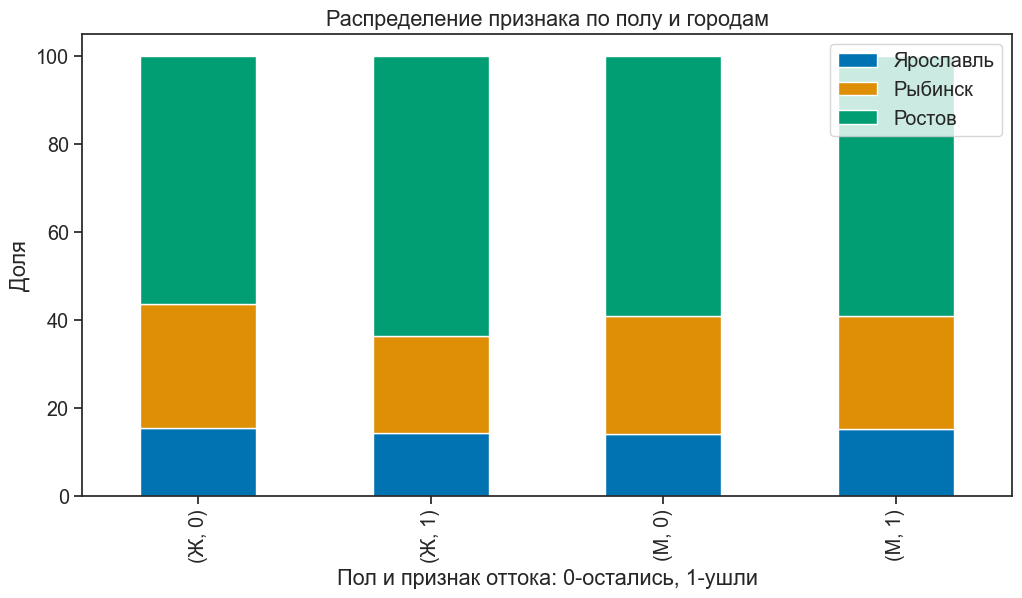

In [40]:
'''Самое просто решение, если ты хочешь построить распределение по продуктам,
    это в легенде прописать продукты, 
    и построить 2 такие диаграмы рядом - для оттока и оставшихся.''' 
# Посмотрим на столбчатых диаграммах по долям распределение категорийных переменных в разрезе пола:
# 1. по количетву продуктов (products):
# Создадим сводную таблицу, в которой отразим число клиентов по полу и продуктам:
category_products=data2.pivot_table(index=['gender','churn'], columns='products', values='userid', aggfunc='count')
category_products.columns=['1', '2', '3', '4']
category_products['1 продукт']=(category_products['1']/(category_products['1']+category_products['2']+category_products['3']+category_products['4'])*100).round(2)
category_products['2 продукта']=(category_products['2']/(category_products['1']+category_products['2']+category_products['3']+category_products['4'])*100).round(2)
category_products['3 продукта']=(category_products['3']/(category_products['1']+category_products['2']+category_products['3']+category_products['4'])*100).round(2)
category_products['4 продукта']=(category_products['4']/(category_products['1']+category_products['2']+category_products['3']+category_products['4'])*100).round(2)
category_products=category_products.drop(columns=['1', '2', '3', '4'])

# Построим столбчатую диаграмму с разделением по полу и продуктам:
sns.set_palette('colorblind')
category_products.plot(kind = 'bar',
              stacked = True, 
              figsize = (12,6)),
plt.title(f"Распределение признака по полу и продуктам")
plt.xlabel('Пол и признак оттока: 0-остались, 1-ушли')
plt.ylabel('Доля');

# 2. по наличию кредитки, активность
# Создадим цикл, в котором подготовим данные для графиков и построим их:
for column in ['credit_card','last_activity']:
# Создадим сводную таблицу, в которой отразим число клиентов по полу и наличию кредитки, активность:
    category_1 = data2.pivot_table (index = ['gender','churn'], columns = column, values = 'userid', aggfunc = 'count')
    category_1.columns = ['00', '11']
    #display(category_1)
    
# Рассчитаем доли клиентов по признакам: 
    category_1 ['Да'] = (category_1['11']/(category_1['00']+category_1['11'])*100).round(2)
    category_1 ['Нет'] = (category_1['00']/(category_1['11']+category_1['00'])*100).round(2)
    category_1=category_1.drop(columns=['00', '11'])
    
# Построим столбчатую диаграмму с разделением по полу и признакам клиентов:
    sns.set_palette('colorblind')
    category_1.plot(kind = 'bar', stacked = True, figsize = (12,6))
    plt.title(f"Распределение признака {column} по полу")
    plt.xlabel('Пол и признак оттока: 0-остались, 1-ушли')
    plt.ylabel('Доля');

# 3. город (city)
# Создадим сводную таблицу, в которой отразим число клиентов по полу и городам:
category_city=data2.pivot_table(index=['gender','churn'], columns='city', values='userid', aggfunc='count')
category_city.columns=['0', '1', '2']
category_city['Ярославль']=(category_city['0']/(category_city['0']+category_city['1']+category_city['2'])*100).round(2)
category_city['Рыбинск']=(category_city['1']/(category_city['0']+category_city['1']+category_city['2'])*100).round(2)
category_city['Ростов']=(category_city['2']/(category_city['0']+category_city['1']+category_city['2'])*100).round(2)
category_city=category_city.drop(columns=['0', '1', '2'])

# Построим столбчатую диаграмму с разделением по полу и городам:
sns.set_palette('colorblind')
category_city.plot(kind = 'bar',
              stacked = True, 
              figsize = (12,6)),
plt.title(f"Распределение признака по полу и городам")
plt.xlabel('Пол и признак оттока: 0-остались, 1-ушли')
plt.ylabel('Доля');

Изучив графики распределения признаков по гендеру и оттоку, можно сделать вывод, что клиенты - мужчины и клиенты - женщины в целом ведут себя одинаково в части оттока:

- клиенты обоих полов со скорринговым баллом около 800-900, из Ярославля, в возрасте около 35-45 лет
- женщины в оттоке с 2-5 объектами в собственности, а мужчины чаще не имеют объектов в собственности, чем женщины
- активно пользующиеся услугами банка "Метанпром" мужчин меньше, чем женщин, но уходят одинаково часто
- при этом в целом доля мужчин в оттоке одинакова с женщинами
- женщины, имеющиеся кредитную карту, уходят реже мужчин.

<a id='12'></a>
### Корреляция отточных признаков

Для построения матрицы корреляций закодируем категориальные признаки city и gender

In [41]:
data2['gender'] = data2['gender'].map({'М':1, 'Ж':0})
data2['city_number'] = data2['city'].map({'Ярославль':0, 'Рыбинск':1, 'Ростов':2})
data2 = pd.get_dummies(data2)
data2.sample(5)

,userid,score,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_number,city_Ростов,city_Рыбинск,city_Ярославль,type_balance_0,type_balance_1
274,159664,906,0,37.00,4,"1,136,322.83",2,1,0,"177,303.49",0,0,0,0,1,0,1
3109,159377,900,0,46.00,5,"1,518,771.63",2,1,0,"225,531.93",0,0,0,0,1,0,1
5276,211235,765,0,32.00,0,"313,582.71",2,0,0,"81,958.57",0,0,0,0,1,0,1
3906,146451,948,0,65.00,5,"1,744,943.13",2,1,1,"85,415.83",0,0,0,0,1,0,1
1361,193480,791,0,42.00,6,"397,404.07",2,0,1,"145,466.73",0,0,0,0,1,0,1


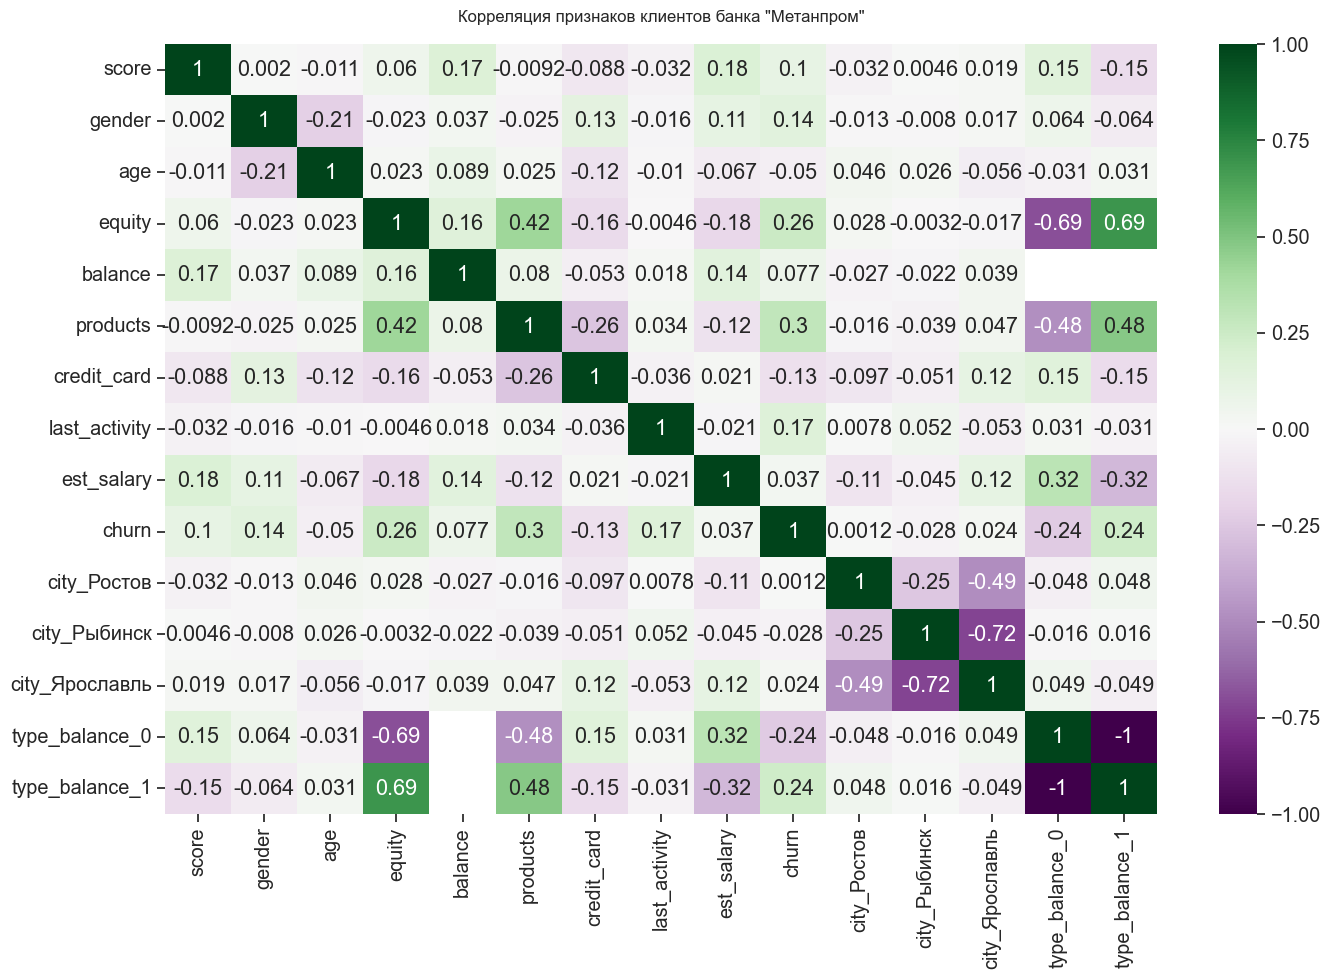

In [42]:
data_corr = data2.drop(['userid', 'city_number'], axis=1)
plt.figure(figsize=(16, 10)) 
heatmap = sns.heatmap(data_corr.corr(),
                      vmin=-1,
                      vmax=1,
                      annot=True,
                      cmap='PRGn') 
heatmap.set_title('Корреляция признаков клиентов банка "Метанпром"',
                  fontdict={'fontsize':12},
                  pad=16);

In [43]:
#sns.heatmap(data_corr.loc[:,['сhurn']].drop('сhurn').sort_values('сhurn'), annot=True, fmt=".0%", cmap='vlag', center=0)

Для оценки тесноты связи примем следующие критерии:
<br>до 0,2 - очень слабая корреляция
<br>до 0,5 - слабая корреляция
<br>до 0,7 - средняя корреляция
<br>до 0,9 - высокая корреляция
<br>свыше 0,9 - очень высокая корреляция

Сильной зависимости между признаками не наблюдается. Больше всего отток коррелирует с количеством банковскиз продуктов у клиента (30%) и количеством объектов в собственности (26%). Но зависимость все равно очень слабая, поэтому утверждать о влиянии этих признаков на отток нельзя.

<a id='13'></a>
### Промежуточные выводы

По итогам иследовательского анализа данных из датасета сформулируем портреты клиентов банка: общий и клиента, склонного к оттоку.

**Общий портрет клиента банка :**
- мужчин и женщин поровну
- 68% клиентов имеют кредитную карту
- чуть больше половины клиентов активны
- значительная часть клиентов имеют баллы кредитного скорринга на уровне 760-940
- средние доходы клиентов составляют 140 - 160 тысяч
- почти половина клиентов с нулевым балансом на счёте
- большинство клиентов находятся в Ярославле (60% клиентов)
- вероятность ухода / оттока клиента - 18,3 %.

**Портрет клиента, склонного к уходу:**
- мужчина, особенно с кредитной картой
- возраст около 35-45 лет
- имеет в собственности 4 объекта
- пользуется 2-3 банковскими продуктами
- активно пользуется услугами банка "Метанпром"
- доход до 260 тысяч

Больше всего отток коррелирует с количеством банковскиз продуктов у клиента (30%) и количеством объектов в собственности (27%). 

<br>[Вернуться в начало](#Start)
<br>[Вернуться к плану работы](#Plan)
<br>[Вернуться к описанию данных](#description)

## Сегментация клиентов по количеству используемых им банковских продуктов

Посмотрим, чем отличаются пользователи, пользующиеся разным количеством продуктов

In [44]:
# Сгруппируем датасет по числу продуктов, чтобы посмотреть количество клиентов в каждом сегменте
data_products = data2.groupby('products')['products'].count().to_frame()
data_products.columns = ['products_cnt']
display('Распределение клиентов по продуктовым сегментам', data_products)

# Сгруппируем датасет vip по числу продуктов, чтобы посмотреть количество vip клиентов в каждом сегменте
vip_products = vip.groupby('products')['products'].count().to_frame()
vip_products.columns = ['products_cnt']
display('Распределение vip клиентов по продуктовым сегментам', vip_products)

'Распределение клиентов по продуктовым сегментам'

,products_cnt
products,
1,3075
2,4968
3,998
4,453


'Распределение vip клиентов по продуктовым сегментам'

,products_cnt
products,
1,231
2,127
3,30
4,21


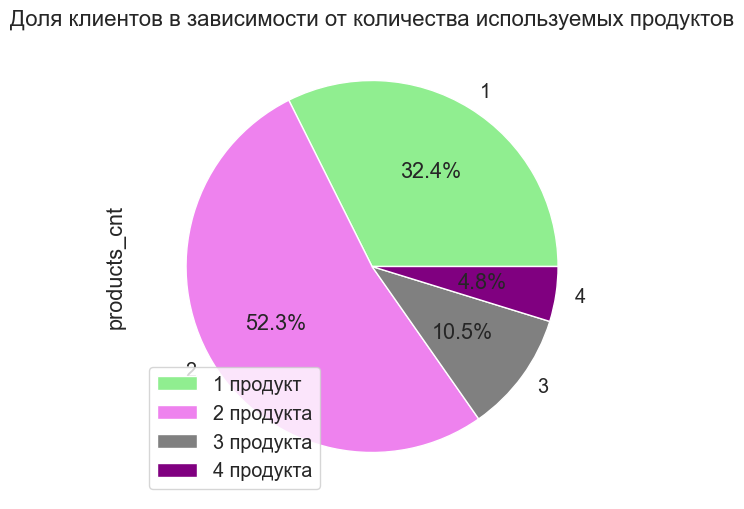

In [45]:
# Посмотрим доли клиентов банка с разным числом продуктов на круговой диаграмме 
data_products.plot(kind = 'pie',
                   y ='products_cnt',
                   autopct='%1.1f%%',
                   figsize= (6,8),
                   colors=['lightgreen', 'violet', 'gray', 'purple'])
plt.title('Доля клиентов в зависимости от количества используемых продуктов', fontsize = 16)
plt.legend(['1 продукт','2 продукта','3 продукта','4 продукта'])
plt.show()

Сегмент клиентов с 2-мя продуктами самый крупный и составляет более 51% от общего числа клиентов банка. Самый малочисленный сегмент - клиенты с 4-мя продуктами, всего 4,7%.



In [46]:
# Сгруппируем признаки по количеству продуктов и дополнительному условию "ушёл - 1 / остался - 0"
data2.groupby(['products', 'churn'])['score', 'city_number', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'est_salary'].agg(
       ['mean', 'median', 'count']).T

products                      1                     2                     3  \
churn                         0          1          0          1          0   
score         mean   853.63     848.16     838.74     861.97     830.74       
              median 884.00     850.00     835.00     866.00     820.00       
              count  2,850.00   225.00     4,021.00   947.00     711.00       
city_number   mean   0.53       0.68       0.63       0.60       0.36         
              median 0.00       0.00       0.00       0.00       0.00         
              count  2,850.00   225.00     4,021.00   947.00     711.00       
gender        mean   0.52       0.73       0.43       0.65       0.37         
              median 1.00       1.00       0.00       1.00       0.00         
              count  2,850.00   225.00     4,021.00   947.00     711.00       
age           mean   42.21      41.52      43.23      40.86      46.58        
              median 40.00      39.00      41.00      38.00      43.00        
              count  2,850.00   225.00     4,021.00   947.00     711.00       
equity        mean   1.27       3.12       3.03       3.73       3.40         
              median 0.00       3.00       3.00       4.00       4.00         
              count  2,850.00   225.00     4,021.00   947.00     711.00       
balance       mean   550,233.26 536,258.90 660,908.51 995,764.01 893,348.34   
              median 411,859.36 395,251.47 468,370.65 740,957.97 612,588.56   
              count  1,146.00   220.00     3,751.00   946.00     692.00       
products      mean   1.00       1.00       2.00       2.00       3.00         
              median 1.00       1.00       2.00       2.00       3.00         
              count  2,850.00   225.00     4,021.00   947.00     711.00       
credit_card   mean   0.86       0.90       0.66       0.46       0.37         
              median 1.00       1.00       1.00       0.00       0.00         
              count  2,850.00   225.00     4,021.00   947.00     711.00       
last_activity mean   0.52       0.65       0.46       0.74       0.35         
              median 1.00       1.00       0.00       1.00       0.00         
              count  2,850.00   225.00     4,021.00   947.00     711.00       
est_salary    mean   144,712.55 113,779.18 112,938.51 129,662.27 109,535.29   
              median 138,610.36 102,502.66 103,439.66 121,965.96 99,653.19    
              count  2,850.00   225.00     4,021.00   947.00     711.00       

products                                   4               
churn                           1          0            1  
score         mean   847.84       866.19     881.17        
              median 842.00       858.50     884.00        
              count  287.00       168.00     285.00        
city_number   mean   0.30         0.57       0.46          
              median 0.00         0.00       0.00          
              count  287.00       168.00     285.00        
gender        mean   0.57         0.55       0.65          
              median 1.00         1.00       1.00          
              count  287.00       168.00     285.00        
age           mean   44.13        38.01      40.83         
              median 42.00        36.00      39.00         
              count  287.00       168.00     285.00        
equity        mean   3.86         4.11       4.14          
              median 4.00         4.00       4.00          
              count  287.00       168.00     285.00        
balance       mean   1,063,592.04 785,137.72 1,304,804.80  
              median 873,446.23   537,433.00 1,238,350.69  
              count  284.00       168.00     285.00        
products      mean   3.00         4.00       4.00          
              median 3.00         4.00       4.00          
              count  287.00       168.00     285.00        
credit_card   mean   0.33         0.49       0.78          
              median 0.00      

Географически самый крупный по количеству клиентов сегмент - г. Ярославль. У клиентов-женщин в основном 3 продукта, у мужчин - один. Склонны к уходу в каждом сегменте в большей степени мужчины. Клиенты из сегмента с 4 продуктами самые активные пользователи банковских услуг. Прослеживается тенденция увеличения числа продуктов с увеличением числа объектов недвижимости. Возможно, клиенты с большим числом объектов недвижимости это предприниматели и им требуетс для деятельности большее число банковских продуктов.

Посмотрим процент оттока клиентов по каждому сегменту:

In [47]:
# Сгруппируем датасет по числу продуктов, чтобы посмотреть количество клиентов в каждом сегменте
churn = data2.groupby('products').agg({'userid': 'count','churn': 'sum'}).reset_index()
churn['percent_churn'] = round(churn['churn']/churn['userid']*100)
display('Процент оттока клиентов по продуктовым сегментам', churn)

# Сгруппируем датасет vip по числу продуктов, чтобы посмотреть количество vip клиентов в каждом сегменте
churn_vip = vip.groupby('products').agg({'userid': 'count','churn': 'sum'}).reset_index()
churn_vip['percent_churn'] = round(churn_vip['churn']/churn_vip['userid']*100)
display('Процент оттока vip клиентов по продуктовым сегментам', churn_vip)

'Процент оттока клиентов по продуктовым сегментам'

,products,userid,churn,percent_churn
0,1,3075,225,7.00
1,2,4968,947,19.00
2,3,998,287,29.00
3,4,453,285,63.00


'Процент оттока vip клиентов по продуктовым сегментам'

,products,userid,churn,percent_churn
0,1,231,10,4.00
1,2,127,31,24.00
2,3,30,10,33.00
3,4,21,15,71.00


Клиенты из сегмента с 1 продуктом наименее склонны к оттоку в обоих датасета - vip и с доходами до 350 000.  С увеличением количества продуктов растет и доля отточных клиентов.

Рассмотрим каждый признак по сегментам / вариантам продуктового портфеля клиентов (1, 2, 3 или 4 продуктов). <br>Сформируем графики распределения признаков в зависимости от числа банковских продуктов, которыми пользуются клиенты банка "Метанпром". 

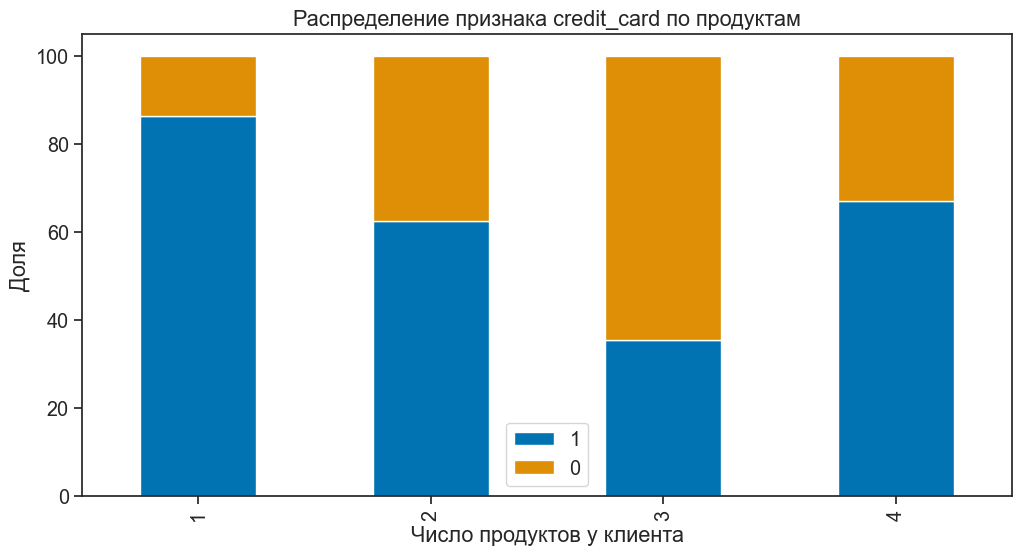

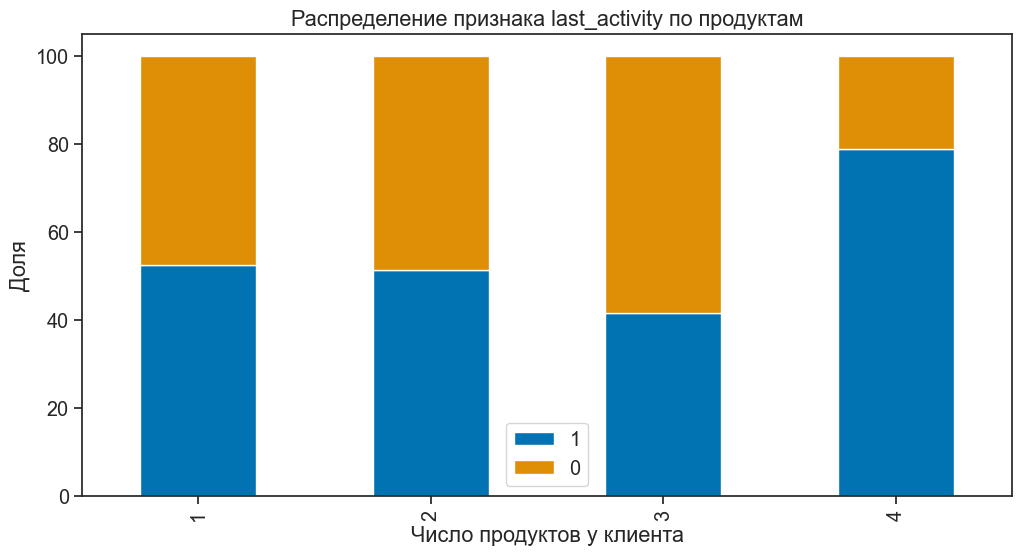

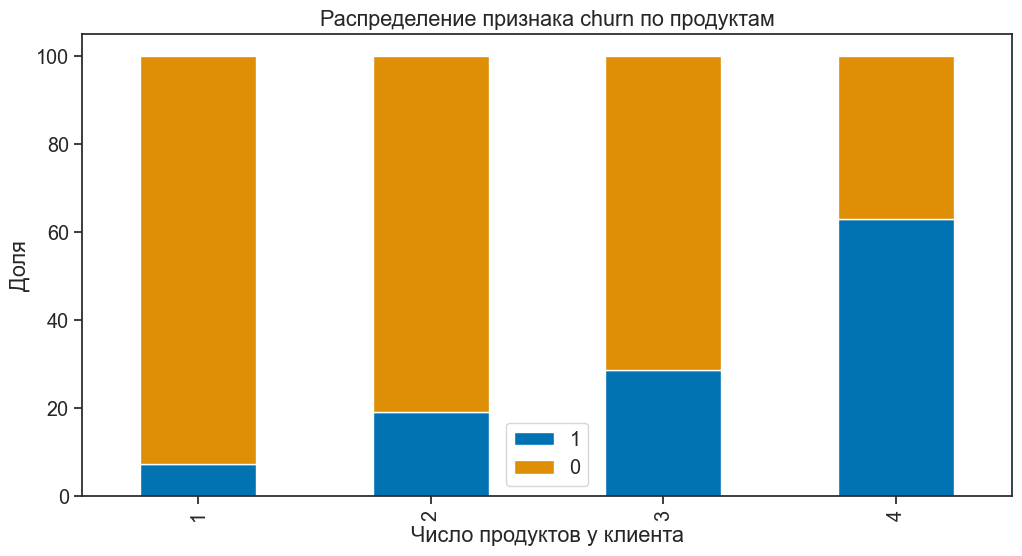

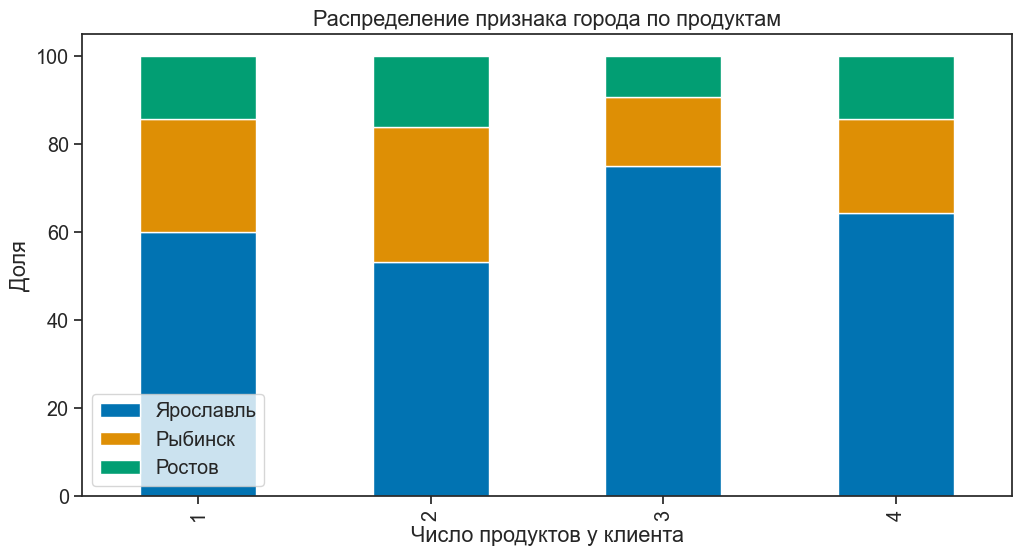

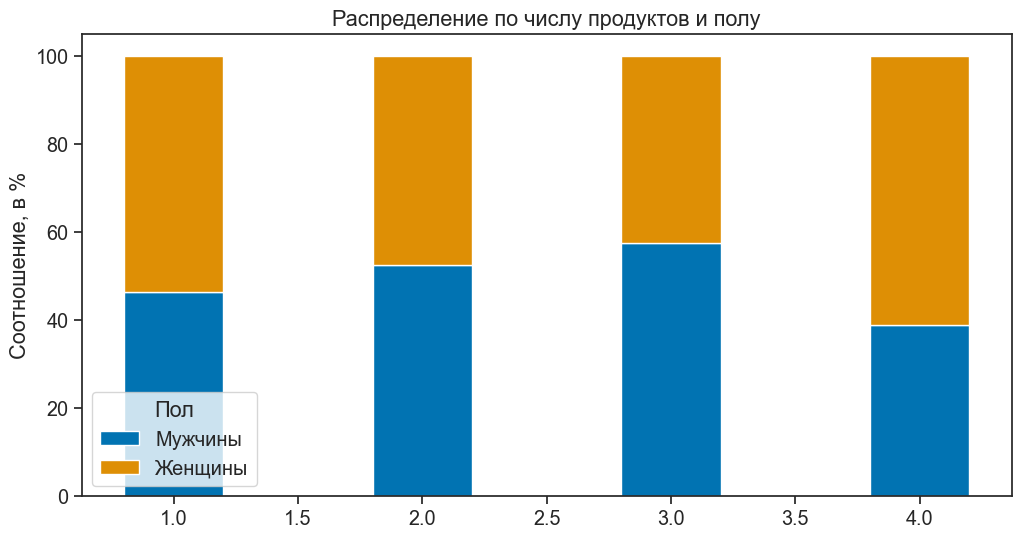

In [48]:
# Посмотрим на столбчатых диаграммах по долям распределение категорийных переменных в разрезе продуктов:
# 1. наличие кредитки, активность, отток

# Создадим цикл, в котором подготовим данные для графиков и построим их:
for column in ['credit_card','last_activity', 'churn']:
# Создадим сводную таблицу, в которой отразим число клиентов по продуктам и признакам:
    category_1 = data2.pivot_table (index = 'products', columns = column, values = 'userid', aggfunc = 'count')
    category_1.columns = ['00', '11']

# Рассчитаем доли клиентов по признакам: 
    category_1 ['1'] = (category_1['11']/(category_1['00']+category_1['11'])*100).round(2)
    category_1 ['0'] = (category_1['00']/(category_1['11']+category_1['00'])*100).round(2)
    category_1=category_1.drop(columns=['00', '11'])
    
# Построим столбчатую диаграмму с разделением по числу продуктов и признакам клиентов:
    sns.set_palette('colorblind')
    category_1.plot(kind = 'bar',
                    stacked = True, 
                    figsize = (12,6)),
    plt.title(f"Распределение признака {column} по продуктам")
    plt.xlabel('Число продуктов у клиента')
    plt.ylabel('Доля');
    
# 2. город (city_number):
# Создадим сводную таблицу, в которой отразим число клиентов по продуктам и городам:
category_city=data2.pivot_table(index='products', columns='city_number', values='userid', aggfunc='count')
category_city.columns=['0', '1', '2']
category_city['Ярославль']=(category_city['0']/(category_city['0']+category_city['1']+category_city['2'])*100).round(2)
category_city['Рыбинск']=(category_city['1']/(category_city['0']+category_city['1']+category_city['2'])*100).round(2)
category_city['Ростов']=(category_city['2']/(category_city['0']+category_city['1']+category_city['2'])*100).round(2)
category_city=category_city.drop(columns=['0', '1', '2'])

# Построим столбчатую диаграмму с разделением по числу продуктов и городам:
sns.set_palette('colorblind')
category_city.plot(kind = 'bar',
              stacked = True, 
              figsize = (12,6)),
plt.title(f"Распределение признака города по продуктам")
plt.xlabel('Число продуктов у клиента')
plt.ylabel('Доля');
    
# 3. пол (gender)
# Создадим сводную таблицу, в которой отразим число клиентов по продуктам и гендеру:
category_gender=data2.pivot_table(index='products', columns='gender', values='userid', aggfunc='count')
category_gender.columns=['0', '1']
category_gender['Женщины']=(category_gender['0']/(category_gender['0']+category_gender['1'])*100).round(2)
category_gender['Мужчины']=(category_gender['1']/(category_gender['0']+category_gender['1'])*100).round(2)
category_gender=category_gender.drop(columns=['0', '1'])

# Построим столбчатую диаграмму с разделением по числу продуктов и городам:
labels =category_gender.index
#labels = ['1', '2', '3', '4']
men = category_gender['Мужчины']
women = category_gender['Женщины']

width = 0.4
fig, ax = plt.subplots()

ax.bar(labels, women, width, label='Мужчины')
ax.bar(labels, men, width, bottom=women, label='Женщины')

ax.set_ylabel('Соотношение, в %')
ax.set_title('Распределение по числу продуктов и полу')
ax.legend(loc='lower left', title='Пол') 
plt.show();

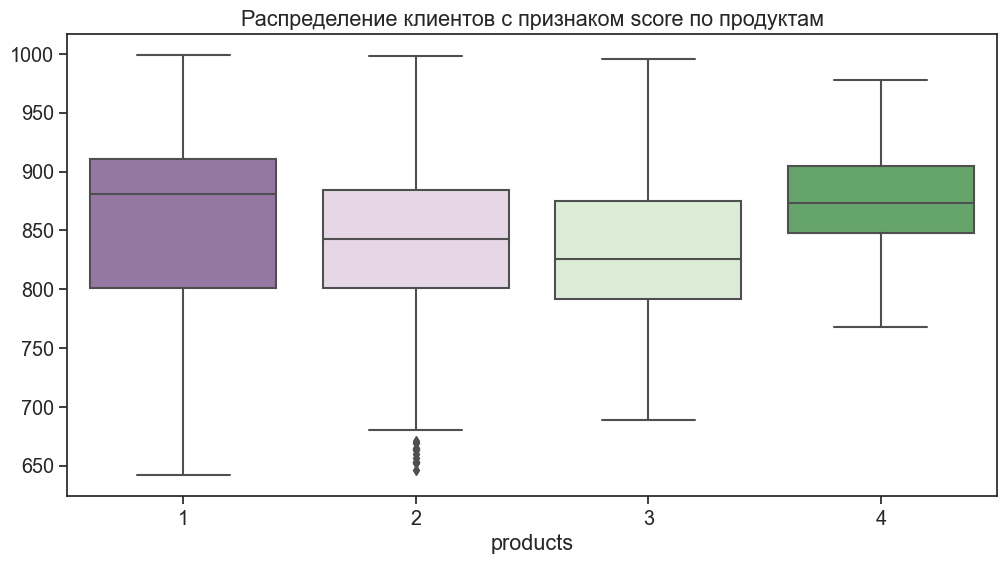

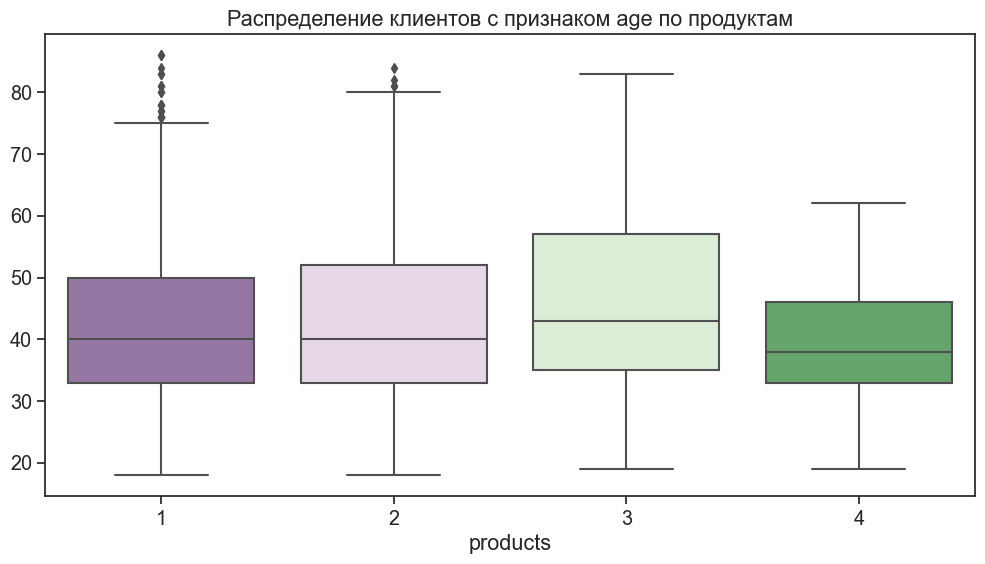

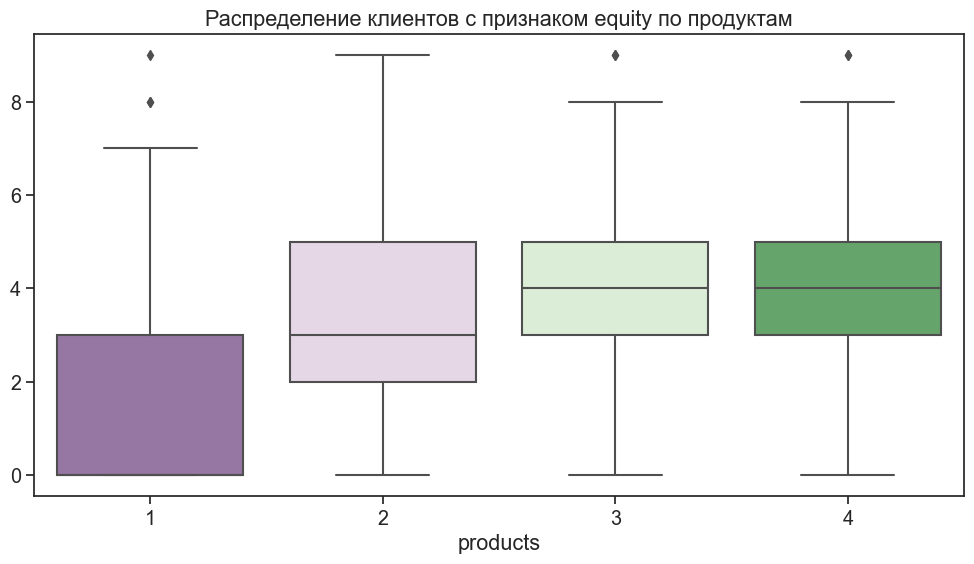

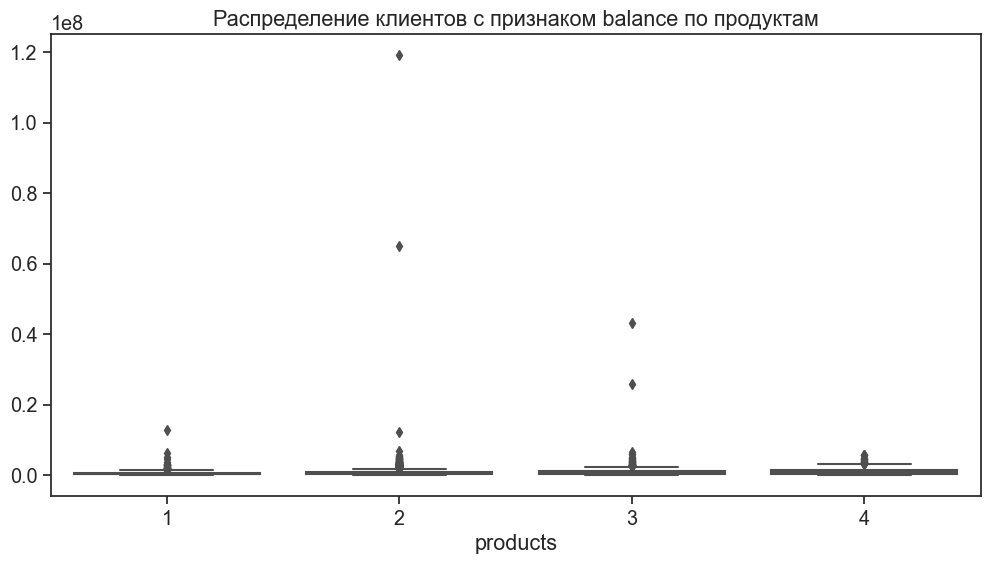

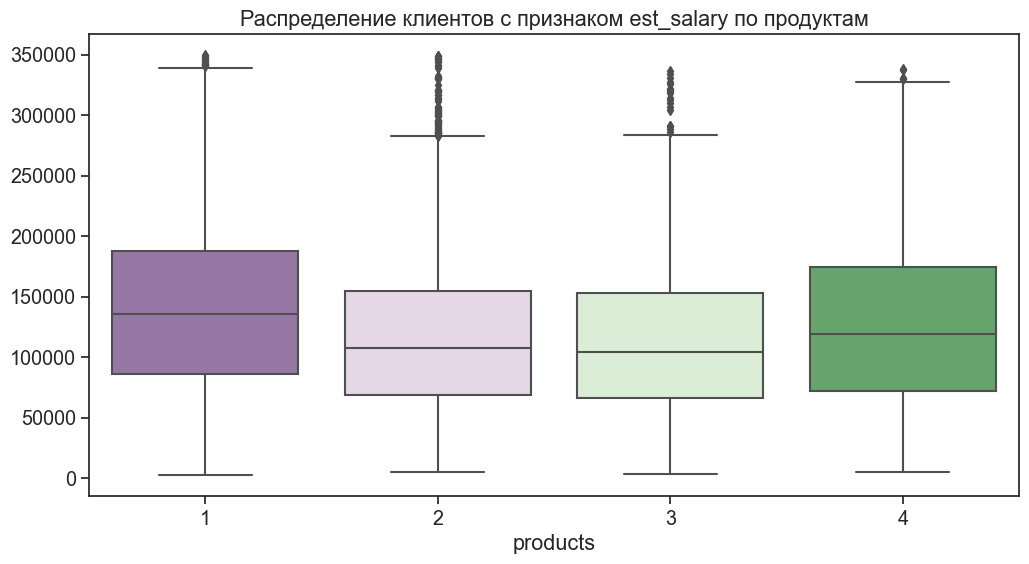

In [49]:
# в цикле построим гистограммы распределения признаков с непрерывными и дискретными значениями по числу продуктов :
# баллы кредитного скоринга, возраст, количество баллов собственности, баланс и оценочный доход клиента

for column in ['score','age','equity','balance','est_salary']:
    plt.figure()
    sns.boxplot(data=data2,
                y = column,
                x = 'products',
                palette='PRGn')                
    plt.ylabel('')
    plt.title(f'Распределение клиентов с признаком {column} по продуктам')
    plt.show();

Изучим сегмент клиентов с доходами от 350 000:

In [50]:
# посмотрим описательную статистику для столбцов числового типа датасета vip
vip.describe()

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,409.00,409.00,409.00,409.00,152.00,409.00,409.00,409.00,409.00,409.00
mean,"171,023.46",883.88,42.18,1.58,"4,879,094.50",1.61,0.73,0.57,"681,292.82",0.16
std,"33,807.50",88.37,10.85,2.13,"4,842,696.19",0.83,0.45,0.50,"263,133.69",0.37
min,"97,550.00",686.00,24.00,0.00,"66,103.84",1.00,0.00,0.00,"350,272.05",0.00
25%,"142,564.00",826.00,34.00,0.00,"1,396,019.48",1.00,0.00,0.00,"444,078.67",0.00
50%,"169,104.00",917.00,40.00,0.00,"3,732,268.21",1.00,1.00,1.00,"648,774.05",0.00
75%,"198,319.00",947.00,49.00,4.00,"6,145,263.62",2.00,1.00,1.00,"881,095.54",0.00
max,"228,876.00","1,000.00",80.00,7.00,"29,008,931.92",4.00,1.00,1.00,"1,395,064.45",1.00


In [51]:
# проверим, как распределены признаки в сегменте с vip клиентами
# по городам, количеству продуктов, активности клиентов и признаку оттока
for column in ['city', 'gender', 'products','credit_card','last_activity','equity',  'churn']:
    print(column)
    print(round(vip[column].value_counts(normalize=True),2))
    print()

city
Ярославль   0.75
Рыбинск     0.21
Ростов      0.04
Name: city, dtype: float64

gender
М   0.60
Ж   0.40
Name: gender, dtype: float64

products
1   0.56
2   0.31
3   0.07
4   0.05
Name: products, dtype: float64

credit_card
1   0.73
0   0.27
Name: credit_card, dtype: float64

last_activity
1   0.57
0   0.43
Name: last_activity, dtype: float64

equity
0   0.60
5   0.17
4   0.10
3   0.05
1   0.04
2   0.03
6   0.01
7   0.00
Name: equity, dtype: float64

churn
0   0.84
1   0.16
Name: churn, dtype: float64



**Вывод по результататам сегментации пользователей по количеству продуктовому портфелю банковских услуг:**
- **Сегмент «Клиенты с 1 продуктом»:** доля клиентов в этом сегменте – 32,4% от общего числа клиентов банка, что составляет 3 075 человек (у vip 56,5% / 231 чел.). В данном сегменте сосредоточены  одни из самых благонадёжных клиентов, судя по баллам кредитного скорринга, который в среднем составляет 858 баллов из 1000 возможных.  Возраст клиентов 39-42 года. Чаще это мужчины. Медианная заработная плата составляет 124 т.р. Это самый высокодоходный сегмент по средним зарплатам клиентов. Средний остаток на балансе около 473 тысяч, самый низкий показатель среди сегментов. Клиенты имеют до 3 объектов в собственности. В 88% случаев у клиентов есть кредитная карта, что, очевидно, и является тем единственным банкоским продуктом, которым в этом банке пользуется клиент и в большей части активно (доля активных 60%). Отток в данном сегменте составляет 7% - самый низкий показатель среди всех сегментов (у vip 4%).

- **Сегмент «Клиенты с 2 продуктами»:** самый крупный сегмент, доля клиентов в данном сегменте – 52,3% от общего числа клиентов банка, 4968 человек (у vip 31% / 127 чел.). В этом сегменте сосредоточены клиенты с самым широким диапазоном по возрасту, а среднему клиенту 38-43 года. Кредитный рейтинг в среднем 850 баллов, это благонадежные заемщики. Заработная плата в среднем 116 тысяч, идентична клиентам из сегментов 3 и 4. Остаток на балансе в среднем составляет 843 тысяч. Клиенты в среднем имеют 3-4 объекта в собственности. Мужчин и женщин примерно поровну в данном сегменте, но женщин немногим больше.  Чаще это жители области – г. Рыбинск и г. Ростов. Кредитной картой пользуются около 53%. По активности клиент сравним с сегментом 1 – доля активных 55%. Средний скорринговый балл 835, один из самых низких из всех сегментов. Отток средний, 19 % клиентов уходят (у vip 24%).

- **Сегмент «Клиенты с 3 продуктами»:** По количеству клиентов, это один из малочисленных сегментов, доля клиентов банка составляет 10.5%, 998 человек (у vip 7.3% / 30 чел.). Это самый «взрослый» сегмент, средний возраст клиентов более 40 лет, в среднем 42-46. Чаще это жители областного центра – г. Ярославль. Среднее значение остатка средств на балансе 860 тысяч – это один из самых высоких показателей среди сегментов, который имеет также большой разброс значений. Заработная плата в среднем от 112 тысяч. Чаще всего в собственности имеют 4 объекта. Мужчин и женщин примерно поровну в данном сегменте. Кредитками пользуются значительно меньше половины клиентов из сегмента – около 18%. Скорринговая оценка клиентов этого сегмента – 835 балла. Это самый неактивный сегмент – доля активных меньше половины, 49%. Отток тут значительный и составляет 29% , почти треть всех клиентов уходят - один из самых худших показателей среди всех сегментов (vip 33%).
	
- **Сегмент «Клиенты с 4 продуктами» :** Это самый малочисленный сегмент из всех представленных, тут находится всего 453 человек, и это составляет 4,8% от всех клиентов банка (у vip 5.1% / 21 чел.). Кредитный рейтинг в среднем 872 – это самые благонадежные заемщики среди рассматриваемых сегментов. Это самый молодой по возрасту клиентов сегмент, средний возраст – 36-39 лет. Чаще это мужчины.  Заработная плата в среднем около 115 т.р. В среднем имеют более 4 объектов в собственности, это самый высокий показатель среди сегментов и отличает клиентов данного сегмента от остальных. Так как доходы клиентов этого сегмента не отличаются в среднем от доходов в остальных сегментах, то можем предположить, что в основном клиенты этого сегмента предприниматели. Средний показатель остатка средств на балансе – 966 тысячи, это самый высокий показатель среди рассматриваемых сегментов и с самый большим разбросом. Больше половины (57%) имеют кредитные карты. Это самый активный сегмент – доля активных 91%. И самый худший показатель по оттоку именно в этом сегменте. Отток составляет 63% (vip 71%), это единственный сегмент, где клиенты чаще уходят, чем остаются.

- **Сегмент "Vip клиенты":** Сегмент vip составляет 4.12% от исходного датасета с клиентской базой банка Метанпром (409 человек). Средний возраст клиентов из vip сегмента 40-42 года, на 60% это мужчины из Ярославля, имеющиеся кредитную карту. Клиенты из vip сегмента чаще пользуются 1-2 продуктами, доля активных клинтов составляет 57%. Средние зарплаты в размере 648-681 тысяч, на банковском счете размещены средства в среднем объёме 3,7 – 4,9 миллионов. Клиенты данного сегмента в среднем имеют высокий скорринговый балл в диапазоне 883-917 и не склонны к оттоку (отток 16%). 

<br>[Вернуться в начало](#Start)
<br>[Вернуться к плану работы](#Plan)
<br>[Вернуться к описанию данных](#description)

## Проверка гипотез

<a id='14'></a>
### Проверка гипотезы о различии дохода между клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним

Проверим гипотезу о различии дохода между клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним.

Проанализируем данные о доходах пользователей с 1 и 2 продуктами. Для этого построим гистограммы распределения доходов.

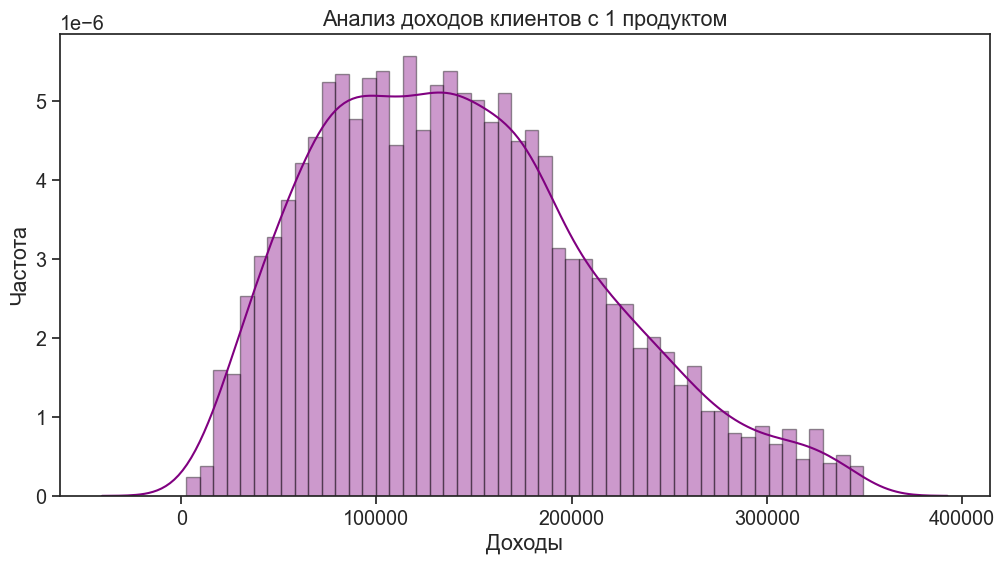

In [52]:
# построим гистограмму распределения доходов клиентов с 1 продуктом
sns.distplot(data2.query('products == 1')['est_salary'],
             hist=True, 
             bins=50,
             color='purple',
             hist_kws={'edgecolor':'black'}).set_title('Анализ доходов клиентов с 1 продуктом')
plt.xlabel("Доходы") 
plt.ylabel("Частота")
plt.show(); 

Распределение переменной с данными о доходах клиентов с 1 продуктом на графике не похоже на купол (нормальное распределение всегда симметрично), "хвост" справа, игнорировать это нельзя. В данные может закрасться выброс, который существенно сдвинет картину и повлияет на результаты.
<br>Проведём проверку на нормальность распределения. Для этого выдвинем гипотезу о нормальности распределения переменной с доходами и проверим её, применив критерий Шапиро-Уилка (метод st.shapiro(x)). Критерий при фиксированном уровне значимости обнаруживает различия между распределениями, если они и правда есть:

In [53]:
alpha = 0.05  # критический уровень статистической значимости

results = st.shapiro(data2.query('products == 1')['est_salary'])
p_value = results[1] # второе значение в массиве результатов (с индексом 1) - p-value

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 

p-значение:  3.60208846126677e-23
Отвергаем нулевую гипотезу: распределение не нормально


Сомнения в нормальности распределения подтвердились: распределение доходов клиентов с 1 продуктом не нормально. 

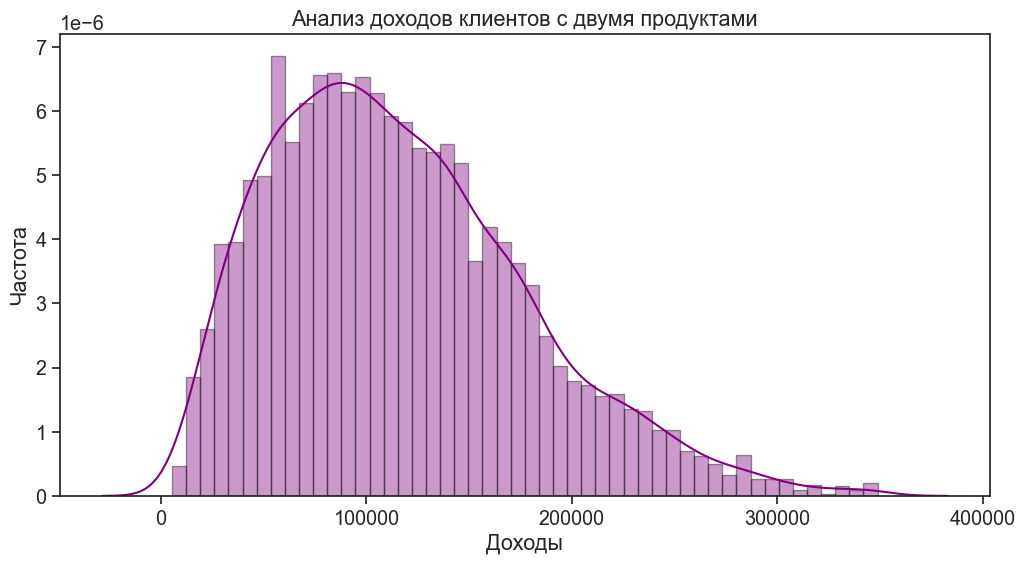

In [54]:
# построим гистограмму распределения доходов клиентов с 2 продуктами
sns.distplot(data2.query('products == 2')['est_salary'],
             hist=True, 
             bins=50,
             color = 'purple',
             hist_kws={'edgecolor':'black'}).set_title('Анализ доходов клиентов с двумя продуктами')

plt.xlabel("Доходы") 
plt.ylabel("Частота"); 

Распределение переменной с данными о доходах клиентов с 2 продуками на графике также, как и в случае с данных о доходах клиентов с 1 продуктом не похоже на нормальное, "хвост" справа.
<br>Снова проведём проверку на нормальность распределения, применив критерий Шапиро-Уилка:

In [55]:
alpha = 0.05  # критический уровень статистической значимости

results = st.shapiro(data2.query('products == 2')['est_salary'])
p_value = results[1] # второе значение в массиве результатов (с индексом 1) - p-value

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 

p-значение:  6.527618394097052e-34
Отвергаем нулевую гипотезу: распределение не нормально


Распределение доходов клиентов с 2 продуктами также не нормально.

Так как работа с самими значениями переменной с данными о доходах клиентов с 1 и 2 продуктами невозможна из-за выбросов, сильно сдвигающих параметрические результаты, и выборки независимы, то применим непараметрический тест U-критерий Манна-Уитни. Ключевая идея этого теста — проранжировать две выборки по порядку от меньшего к большему и сравнить ранги одних и тех же значений, попавших в обе выборки.

Проверим статистическую значимость различий в среднем доходе между сегментами: клиентами с 1 продуктом и клиентами с 2 продуктами.

Сформулируем нулевую и альтернативную гипотезы:

Н_0: разница среднего дохода группы 1 и 2 НЕ является статистически значимой
<br>Н_1: разница среднего дохода группы 1 и 2 является статистически значимой

In [56]:
alpha = 0.05  # критический уровень статистической значимости

results = st.mannwhitneyu(data2.query('products == 1')['est_salary'], data2.query('products == 2')['est_salary'])

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя') 

p-значение:  8.69228035029054e-59
Отвергаем нулевую гипотезу: разница статистически значима


Отвергаем нулевую гипотезу: разница среднего дохода группы 1 и 2 является статистически значимой - есть различия в среднем доходе клиентов с 1 и 2 продуктами.

<a id='15'></a>
### Проверка гипотезы о различии возраста между оставшимися и ушедшими клиентами

Проверим гипотезу о различии возраста между оставшимися и ушедшими клиентами.

Проанализируем данные о возрасте оставшихся и ушедших клиентов. Для этого построим гистограммы распределения возраста.

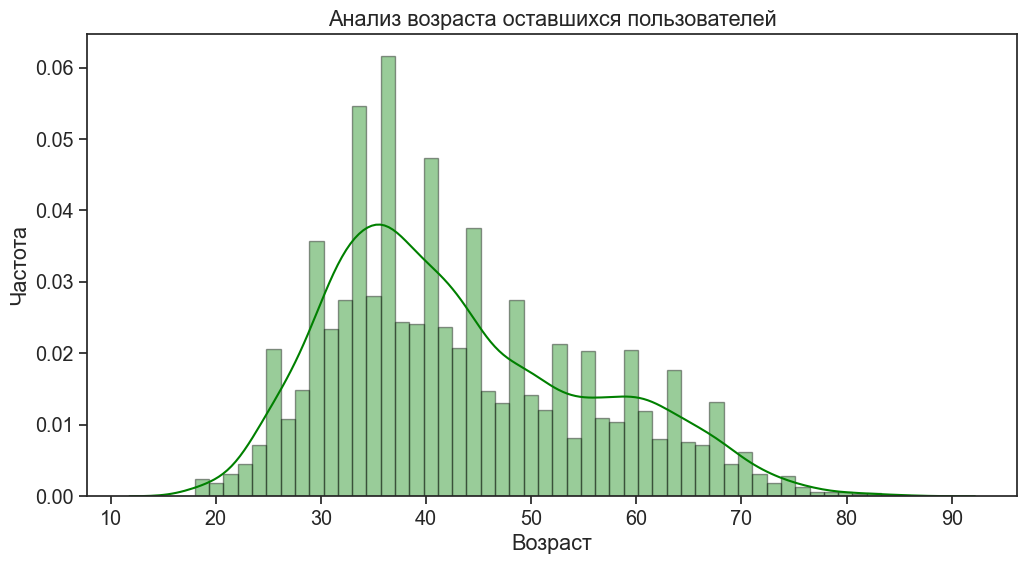

In [57]:
# построим гистограмму распределения возраста оставшихся клиентов
sns.distplot(data2.query('churn == 0')['age'],
             hist=True, 
             bins=50,
             color = 'green',
             hist_kws={'edgecolor':'black'}).set_title('Анализ возраста оставшихся пользователей')
plt.xlabel("Возраст") 
plt.ylabel("Частота"); 

Распределение переменной с данными о возрасте оставшихся клиентов не похоже на нормальное (не симметрично, "хвост" справа). Выбросы могут повлиять на результаты.
<br>Проведём проверку на нормальность распределения, выдвинем гипотезу о нормальности распределения переменной с возрастом и проверим её, применив критерий Шапиро-Уилка:

In [58]:
alpha = 0.05  # критический уровень статистической значимости

results = st.shapiro(data2.query('churn == 0')['age'])
p_value = results[1] 

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 

p-значение:  2.2098476782402365e-42
Отвергаем нулевую гипотезу: распределение не нормально


Распределение данных о возрасте оставшихся клиентов не нормально.

Построим гистограмму распределения возраста ушедших клиентов.

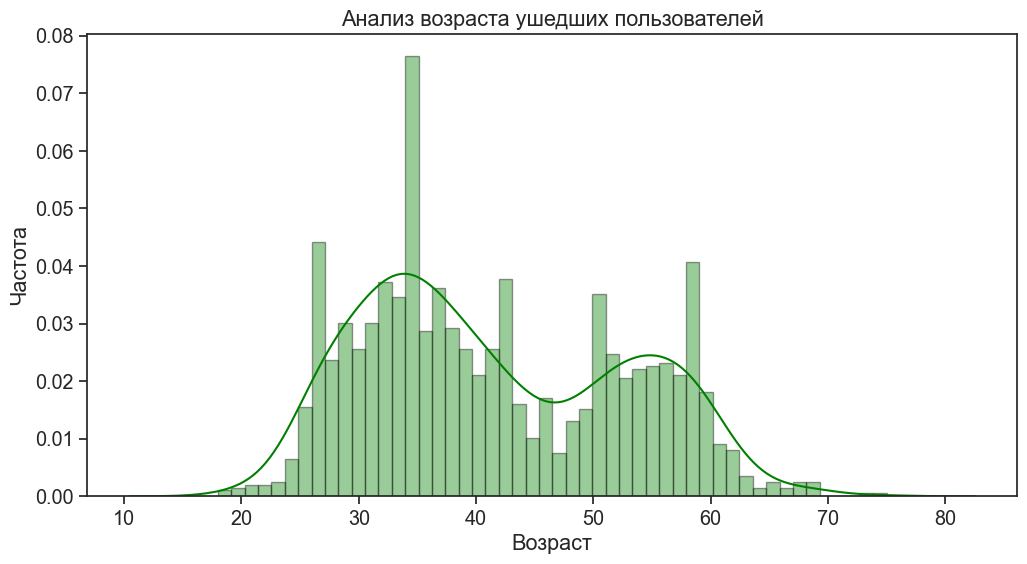

In [59]:
# построим гистограмму распределения возраста ушедших клиентов
sns.distplot(data2.query('churn == 1')['age'],
             hist=True, 
             bins=50,
             color = 'green',
             hist_kws={'edgecolor':'black'}).set_title('Анализ возраста ушедших пользователей')
plt.xlabel("Возраст") 
plt.ylabel("Частота"); 

Распределение переменной с данными о возрасте ушедших клиентов с явными выбросами, которые повлияют на результаты.
<br>Проверим себя, проведём проверку на нормальность распределения, выдвинем гипотезу о нормальности распределения переменной с возрастом и проверим её, применив критерий Шапиро-Уилка:

In [60]:
alpha = 0.05  # критический уровень статистической значимости

results = st.shapiro(data2.query('churn == 1')['age'])
p_value = results[1] 

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 

p-значение:  2.258116550005681e-23
Отвергаем нулевую гипотезу: распределение не нормально


Распределение возраста оставшихся и ушедших клиентов также не нормально.

Так как работа с самими значениями переменной невозможна из-за выбросов, сильно сдвигающих параметрические результаты, и выборки независимы, то применим непараметрический тест U-критерий Манна-Уитни.

Проверим статистическую значимость различий в среднем возрасте между сегментами: оставшимися и ушедшими клиентами.

Сформулируем нулевую и альтернативную гипотезы:

Н_0: разница среднего возраста оставшихся и ушедших клиентов НЕ является статистически значимой
<br>Н_1: разница среднего возраста оставшихся и ушедших клиентов является статистически значимой

In [61]:
alpha = 0.05  # критический уровень статистической значимости

results = st.mannwhitneyu(data2.query('churn == 0')['age'], data2.query('churn == 1')['age'])

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя') 

p-значение:  1.1977843574214286e-05
Отвергаем нулевую гипотезу: разница статистически значима


Отвергаем нулевую гипотезу: разница среднего возраста оставшихся и ушедших клиентов является статистически значимой - есть различия в среднем возрасте оставшихся и ушедших клиентов.

<br>[Вернуться в начало](#Start)
<br>[Вернуться к плану работы](#Plan)
<br>[Вернуться к описанию данных](#description)

## Выводы и рекомендации

**По результатам исследования можно сделать следующие выводы:**
- 85% клиентов имеют не более двух продуктов в банке, а те, кто имеют 3 и 4 продукта уходят с вероятностью 29% и 63%
- больше половины клиентов банка "Метанпром" обслуживаются в филиале в городе Ярославль (58,3 %)
- больше клиентов мужчин, чем женщин
- клиенты старше 40 лет более склонны к уходу из банка, независимо от количества используемых продуктов 
- большинство клиентов имеют кредитную карту (68%)
- женщины, имеющие кредитную карту, уходят реже мужчин
- 18,4% клиентов уходят 
- среди мужчин отток выше, чем среди женщин, особенно в Рыбинске и Ростове
- активные клиенты во всех трёх городах присутствия банка уходят чаще, чем неактивные

**Результаты сегментации клиентов по портфелю банковских продуктов**

**Краткий портрет клиентов из каждого сегмента:**

**Сегмент "1 продукт"** – треть от клиентской базы банка «Метанпром». Это активные клиенты, в основном мужчины, они не склонны к оттоку, пользуются единственным в этом банке продуктом - кредитной картой. Имеют высокий доход, но не хранят средства на счетах в «Метанпром».

**Сегмент "2 продукта"** -  половина от клиентской базы банка «Метанпром». Жители провинции разного возраста, в основном женщины 38-43 год. Имеют средние зарплаты среди сегментов клиентов, половина из них пользуется кредитными картами. Достаточно активно пользуются двумя продуктами банка, но в 19% случаев склонны к отоку.

**Сегмент "3 продукта"** – десятая часть клиентской базы банка «Метанпром». Это самые «взрослый» клиентский сегмент, жители областного центра. Имеют средние заплаты ниже среднего уровня по сегментам и хранят средства на счетах «Метанпром», имеют в среднем 4 объекта недвижимости в собсвенности. Редко пользутся кредитками (только 18%), больше половины не активные клиенты, хотя используют три банковских продукта. Почти треть всех клиентов уходят - один из самых худших показателей среди всех сегментов. 

**Сегмент "4 продукта"** –  всего 5% клиентской базы банка «Метанпром». Молодые предприниматели, чаще мужчины, собственники более 4 объектов недвижимости. Больше 90% активных клиентов, хранящих средства на счетах «Метанпром». Пользуются кредитными картами и еще тремя банковскими продутами. Большая часть из них уходит (63%), самый худший показатель по оттоку среди рассматриваемых в банке сегментов клиентов.

**Сегмент "vip"** - составляет 4.12% от исходного датасета с клиентской базой банка Метанпром (409 человек). Средний возраст клиентов из vip сегмента 40-42 года, на 60% это мужчины из Ярославля, имеющиеся кредитную карту. Клиенты из vip сегмента чаще пользуются 1-2 продуктами, доля активных клинтов составляет 57%. Средние зарплаты в размере 648-681 тысяч, на банковском счете размещены средства в среднем объёме 3,7 – 4,9 миллионов. Клиенты данного сегмента в среднем имеют высокий скорринговый балл в диапазоне 883-917 и не склонны к оттоку (отток 16%).

**По результатам проверки гипотез определено:**
- средний доход клиентов, пользующихся одним продуктом банка отличается от среднего дохода клиентов, пользующихся двумя продуктами;
- средний возраст ушедших и оставшихся клиентов различен.

**Рекомендации:**
- *Для клиентов, пользующихся 1 продуктом:* учитывать благонадежность клиентов данного сегмента и широкое использование ими кредиток, предложить другие кредитные продукты с минимальными условиями получения. Учитывая высокие доходы клиентов из данного сегмента, предложить делать вклады, предложить венчурные продукты.
- *Для клиентов, пользующихся 2 продуктами:* учитывая специфику географического распределения клиентов (область), предложить соответствующие продукты - сельская ипотека, страхование для фермеров, разработать и предлагать кредитные карты с простыми условиями пользования.
- *Для клиентов, пользующихся 3 продуктами:* учитывая «взрослый» возраст клиентов предложить ориентированные продукты – страхование от болезней, пенсионные вклады, ипотека с неколькими поручителями (для помощи взрослым детям в покупке недвижимости). Взять во внимание географическое распределение клиентов (областной центр) и предложить такие продукты как кредит на путешествие, дачная ипотека, кредит на обновление гардероба (клиенты –женщины здесь немного, но преобладают) и так далее. В данном сегменте большой отток, поэтому необходимо проверить качество предлагаемых продуктов. 
- *Для клиентов, пользующихся 4 продуктами:* в этом сегменте отток больше половины всех клентов. Уитывая молодой возраст большинства клиентов сегмента и предположение о предпринимательской деятельности, а также их высокую активность, то провести опрос, чтобы собрать обратную связь о качестве оказания услуг и причинах ухода. По результатам разработать продукты, подходящие сегменту.
- *Для клиентов сегмента vip:* учитывая высокие доходы клиентов и значительные сбережения на счетах банка Метанпром, а значит высокую лояльность этих клиентов по отношению к банку, низкую долю оттока, активность 50 / 50 - разработать премиальные продукты для клиентов данного сегмента, продумать распределение персональных менеджеров банка для работы с vip, продумать нюансы персонального подхода к каждом клиенту, учитывая потребности каждого.

Снизить общий отток помогут грамотный онбординг, хорошая техподдержка, программы лояльности и персональные предложения.

Ссылка на презентацию https://disk.yandex.ru/i/ZzbZHEC6dNdGag
<br>Ссылка на дашборд https://public.tableau.com/views/_16949473793690/sheet2?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link